In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [13]:
data = pd.read_csv('........dataset.csv',parse_dates=['Date'],index_col=['Date'])

In [14]:
data.head()

,Unix Timestamp,Symbol,Open,High,Low,Close,Volume
Date,,,,,,,
2020-04-16 00:00:00,1586995200000,ETHUSD,152.94,152.94,150.39,150.39,650.188125
2020-04-15 23:00:00,1586991600000,ETHUSD,155.81,155.81,151.39,152.94,4277.567299
2020-04-15 22:00:00,1586988000000,ETHUSD,157.18,157.30,155.32,155.81,106.337279
2020-04-15 21:00:00,1586984400000,ETHUSD,158.04,158.31,157.16,157.18,55.244131
2020-04-15 20:00:00,1586980800000,ETHUSD,157.10,158.10,156.87,158.04,144.262622


In [15]:
data = data.sort_index()

In [16]:
data.head(-5)

,Unix Timestamp,Symbol,Open,High,Low,Close,Volume
Date,,,,,,,
2016-05-09 13:00:00,1462798800,ETHUSD,0.00,12.00,0.00,9.55,432.562115
2016-05-09 14:00:00,1462802400,ETHUSD,9.55,10.00,9.55,10.00,235.774075
2016-05-09 15:00:00,1462806000,ETHUSD,10.00,10.00,9.99,9.99,10.973567
2016-05-09 16:00:00,1462809600,ETHUSD,9.99,9.99,9.79,9.83,62.379450
2016-05-09 17:00:00,1462813200,ETHUSD,9.83,9.83,9.48,9.49,329.553213
...,...,...,...,...,...,...,...
2020-04-15 15:00:00,1586962800000,ETHUSD,157.12,157.15,155.81,155.81,303.839541
2020-04-15 16:00:00,1586966400000,ETHUSD,155.81,157.52,155.74,157.12,430.083035
2020-04-15 17:00:00,1586970000000,ETHUSD,157.12,157.78,156.90,157.48,156.552221


In [17]:
data.shape

(34497, 7)

In [18]:
data.isna().sum()

Unix Timestamp    0
Symbol            0
Open              0
High              0
Low               0
Close             0
Volume            0
dtype: int64

In [19]:
data.duplicated().sum()

0

In [20]:
data = data.drop(columns=['Unix Timestamp','Symbol'])

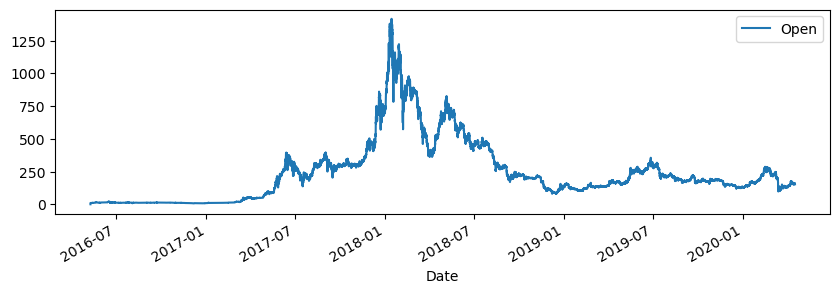

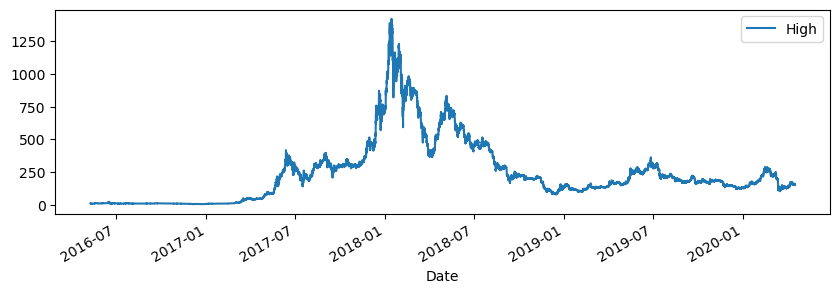

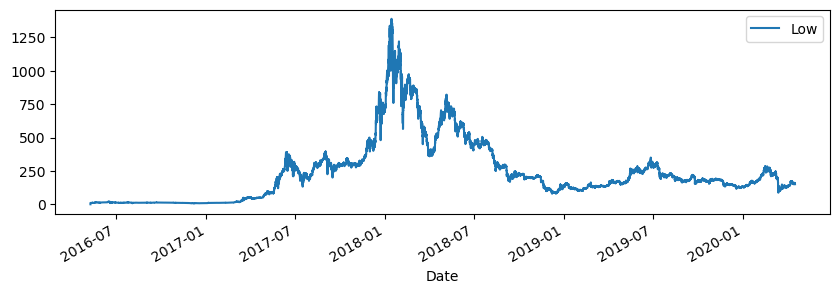

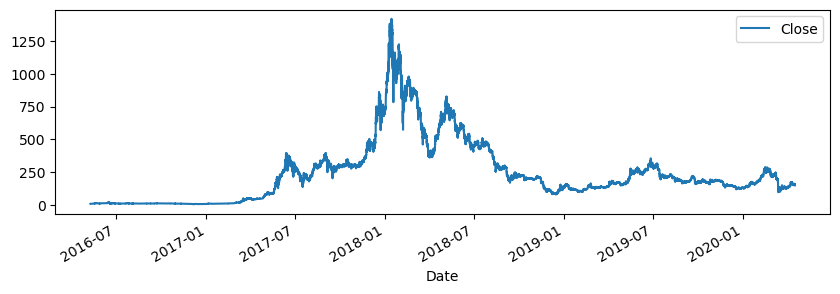

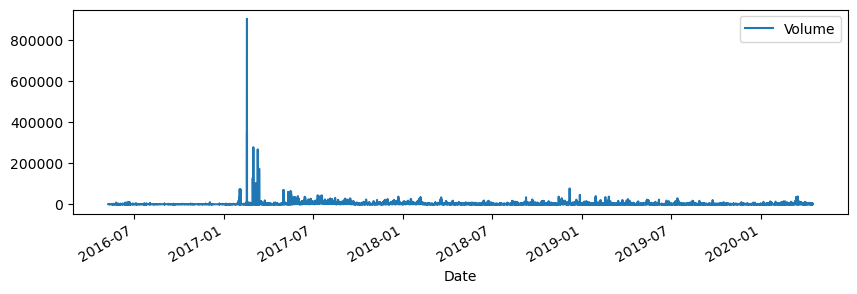

In [21]:
for i in data:
    plt.figure(figsize=(10,3))
    data[i].plot(legend=i)
    plt.show()

In [22]:
#creating the datatime features
def create_f(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['day'] = df.index.day
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofweek'] = df.index.dayofweek
    df['dayofyear'] = df.index.dayofyear
    df['weekofyear'] = df.index.isocalendar().week
    
    return df

In [23]:
df = create_f(data)

In [24]:
df.head()

,Open,High,Low,Close,Volume,hour,day,month,year,dayofweek,dayofyear,weekofyear
Date,,,,,,,,,,,,
2016-05-09 13:00:00,0.00,12.00,0.00,9.55,432.562115,13,9,5,2016,0,130,19
2016-05-09 14:00:00,9.55,10.00,9.55,10.00,235.774075,14,9,5,2016,0,130,19
2016-05-09 15:00:00,10.00,10.00,9.99,9.99,10.973567,15,9,5,2016,0,130,19
2016-05-09 16:00:00,9.99,9.99,9.79,9.83,62.379450,16,9,5,2016,0,130,19
2016-05-09 17:00:00,9.83,9.83,9.48,9.49,329.553213,17,9,5,2016,0,130,19


<Axes: >

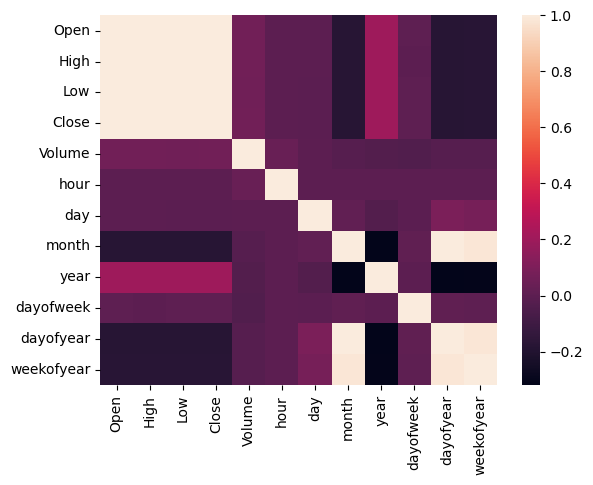

In [25]:
#correlation
sns.heatmap(df.corr())

In [26]:
#generating windows 
# 24 hour window to predict 25th hour

close = df.iloc[:,3]
windows=[]
target=[]
length = 240
for i in (range(len(close)-length)):
    x = close.iloc[i:i+length]
    y = close.iloc[i+length]
    windows.append(x)
    target.append(y)
    
    
windows=np.array(windows)
target=np.array(target).reshape(-1,1)




In [27]:
#creating train and test data

from sklearn.preprocessing import MinMaxScaler



sc = MinMaxScaler()
windows_sc = sc.fit_transform(windows)
target_sc = sc.fit_transform(target)

windows_sc = windows_sc.reshape((len(windows_sc),length,1))

In [28]:
#splitting

split = int(0.8*len(windows_sc))

X_train = windows_sc[:split,:,:]
X_test = windows_sc[split:,:,:]
y_train = target_sc[:split,:]
y_test = target_sc[split:,:]

In [29]:
print(X_train.shape,y_train.shape)

(27405, 240, 1) (27405, 1)


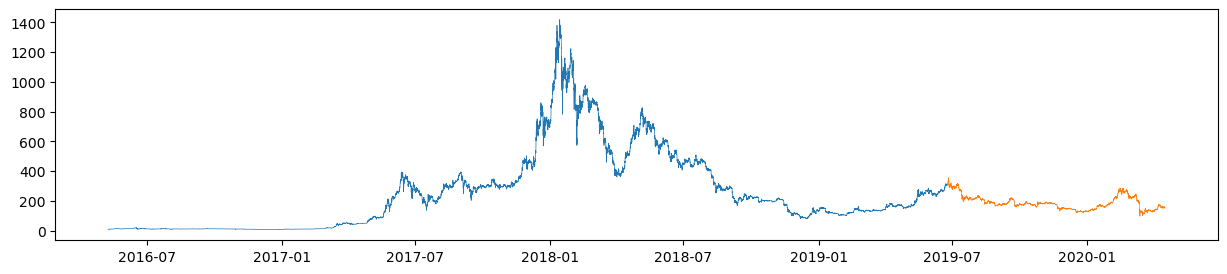

In [30]:
plt.figure(figsize=(15,3))
plt.plot(df['Close'][:split],label='Train',linewidth=0.5)
plt.plot(df['Close'][split:],label='Test',linewidth=0.5)

# Model building and training

In [31]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import *

In [32]:
model = Sequential()
model.add(LSTM(100,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse')

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model.fit(X_train,y_train, epochs=5, batch_size=100, verbose=1)

Epoch 1/5

275/275 [==============================] - 134s 473ms/step - loss: 0.0012
Epoch 2/5
275/275 [==============================] - 127s 463ms/step - loss: 2.6245e-04
Epoch 3/5
275/275 [==============================] - 129s 471ms/step - loss: 2.5483e-04
Epoch 4/5
275/275 [==============================] - 129s 470ms/step - loss: 2.1228e-04
Epoch 5/5
275/275 [==============================] - 130s 474ms/step - loss: 1.9375e-04


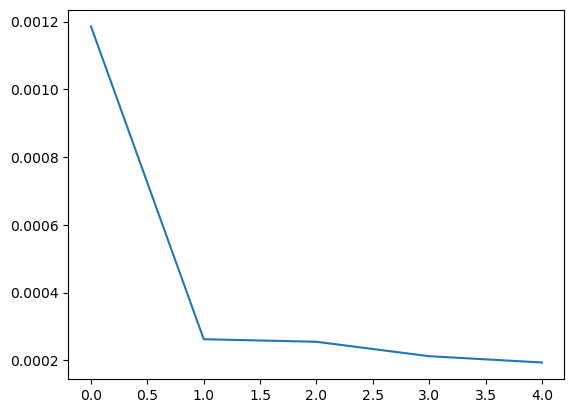

In [35]:
plt.plot(model.history.history['loss'])

In [36]:
pred_sc = model.predict(X_test)
pred = sc.inverse_transform(pred_sc)
y_test_ic = sc.inverse_transform(y_test)

215/215 [==============================] - 18s 81ms/step


The Coefficient of determination (R-squared) = 0.963


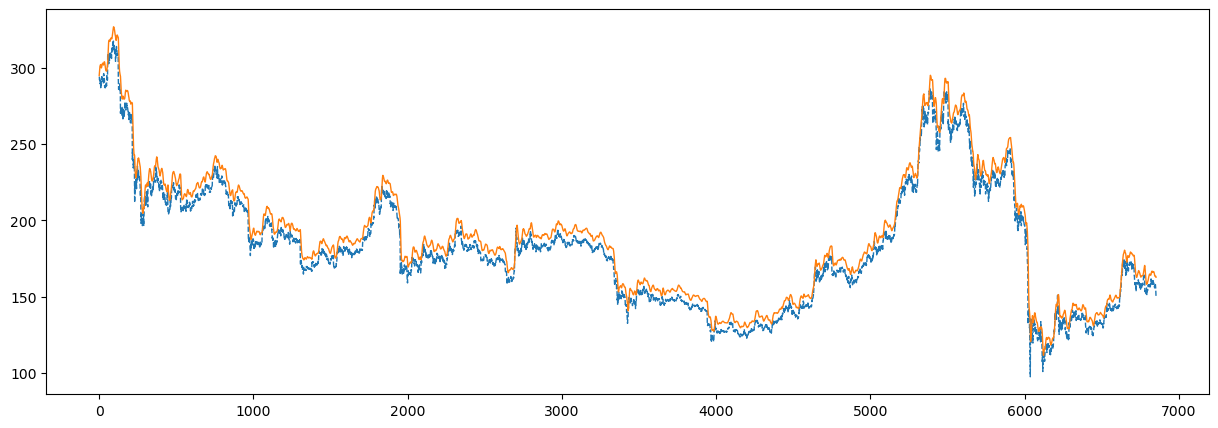

In [37]:
print('The Coefficient of determination (R-squared) = {:.3f}'.format(r2_score(pred,y_test_ic)))

plt.figure(figsize=(15,5))
plt.plot(y_test_ic,'--',label='Actual',linewidth=1)
plt.plot(pred,label='Predicted',linewidth=1)

# Future Prediction

In [38]:
model = Sequential()
model.add(LSTM(100,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse')

In [39]:
#training on entire dataset

X = windows_sc
y = target_sc

model.fit(X,y, epochs=5, batch_size=100, verbose=1)

Epoch 1/5
343/343 [==============================] - 164s 469ms/step - loss: 0.0011
Epoch 2/5
343/343 [==============================] - 160s 467ms/step - loss: 2.1004e-04
Epoch 3/5
343/343 [==============================] - 158s 460ms/step - loss: 1.9520e-04
Epoch 4/5
343/343 [==============================] - 156s 455ms/step - loss: 1.7566e-04
Epoch 5/5
343/343 [==============================] - 156s 456ms/step - loss: 1.5267e-04


In [40]:
from datetime import datetime
from tqdm import tqdm

str_d1 = '2019/04/16'
str_d2 = '2019/05/16'

# convert string to date object
d1 = datetime.strptime(str_d1, "%Y/%m/%d")
d2 = datetime.strptime(str_d2, "%Y/%m/%d")

delta = d2-d1
steps_in_future = delta.days * 24
print("Steps in future: ",steps_in_future)



Steps in future:  720


In [41]:
#iterative prediction of each future step

f_wind=windows_sc[-1]
f_tar=target_sc[-1]
new=[]

for i in tqdm(range(steps_in_future)):
    curr = np.append(f_wind[1:],[f_tar]).reshape(-1,1)
    #print(curr,end="\n\n")
    next_pred = model.predict(curr.reshape(1,length,1))
    #pred_ic = sc.inverse_transform(next_pred)
    new.append(next_pred[0][0])
    f_wind = curr
    f_tar=next_pred
    

  0%|                                                                                          | 0/720 [00:00<?, ?it/s]

1/1 [==============================] - 1s 665ms/step


  0%|                                                                                  | 1/720 [00:00<08:50,  1.35it/s]

1/1 [==============================] - 0s 32ms/step


  0%|▏                                                                                 | 2/720 [00:00<04:24,  2.71it/s]

1/1 [==============================] - 0s 47ms/step


  0%|▎                                                                                 | 3/720 [00:00<02:59,  3.99it/s]

1/1 [==============================] - 0s 47ms/step


  1%|▍                                                                                 | 4/720 [00:01<02:24,  4.97it/s]

1/1 [==============================] - 0s 47ms/step


  1%|▌                                                                                 | 5/720 [00:01<02:00,  5.94it/s]

1/1 [==============================] - 0s 47ms/step


  1%|▋                                                                                 | 6/720 [00:01<01:45,  6.74it/s]

1/1 [==============================] - 0s 47ms/step


  1%|▊                                                                                 | 7/720 [00:01<01:36,  7.36it/s]

1/1 [==============================] - 0s 55ms/step


  1%|▉                                                                                 | 8/720 [00:01<01:34,  7.54it/s]

1/1 [==============================] - 0s 47ms/step


  1%|█                                                                                 | 9/720 [00:01<01:29,  7.97it/s]

1/1 [==============================] - 0s 47ms/step


  1%|█▏                                                                               | 10/720 [00:01<01:25,  8.29it/s]

1/1 [==============================] - 0s 47ms/step


  2%|█▏                                                                               | 11/720 [00:01<01:23,  8.52it/s]

1/1 [==============================] - 0s 47ms/step


  2%|█▎                                                                               | 12/720 [00:01<01:21,  8.69it/s]

1/1 [==============================] - 0s 40ms/step


  2%|█▍                                                                               | 13/720 [00:02<01:20,  8.81it/s]

1/1 [==============================] - 0s 47ms/step


  2%|█▌                                                                               | 14/720 [00:02<01:19,  8.90it/s]

1/1 [==============================] - 0s 47ms/step


  2%|█▋                                                                               | 15/720 [00:02<01:18,  8.96it/s]

1/1 [==============================] - 0s 47ms/step


  2%|█▊                                                                               | 16/720 [00:02<01:18,  9.01it/s]

1/1 [==============================] - 0s 47ms/step


  2%|█▉                                                                               | 17/720 [00:02<01:17,  9.03it/s]

1/1 [==============================] - 0s 59ms/step


  2%|██                                                                               | 18/720 [00:02<01:17,  9.04it/s]

1/1 [==============================] - 0s 63ms/step


  3%|██▏                                                                              | 19/720 [00:02<01:17,  9.06it/s]

1/1 [==============================] - 0s 47ms/step


  3%|██▎                                                                              | 20/720 [00:02<01:17,  9.07it/s]

1/1 [==============================] - 0s 47ms/step


  3%|██▎                                                                              | 21/720 [00:02<01:20,  8.71it/s]

1/1 [==============================] - 0s 42ms/step


  3%|██▍                                                                              | 22/720 [00:03<01:19,  8.81it/s]

1/1 [==============================] - 0s 47ms/step


  3%|██▌                                                                              | 23/720 [00:03<01:18,  8.90it/s]

1/1 [==============================] - 0s 63ms/step


  3%|██▋                                                                              | 24/720 [00:03<01:17,  8.97it/s]

1/1 [==============================] - 0s 47ms/step


  3%|██▊                                                                              | 25/720 [00:03<01:17,  9.01it/s]

1/1 [==============================] - 0s 47ms/step


  4%|███                                                                              | 27/720 [00:03<01:15,  9.15it/s]

1/1 [==============================] - 0s 48ms/step


  4%|███▏                                                                             | 28/720 [00:03<01:16,  9.03it/s]

1/1 [==============================] - 0s 47ms/step


  4%|███▎                                                                             | 29/720 [00:03<01:16,  9.05it/s]

1/1 [==============================] - 0s 47ms/step


  4%|███▍                                                                             | 30/720 [00:03<01:16,  9.07it/s]

1/1 [==============================] - 0s 47ms/step


  4%|███▍                                                                             | 31/720 [00:04<01:15,  9.08it/s]

1/1 [==============================] - 0s 47ms/step


  4%|███▌                                                                             | 32/720 [00:04<01:15,  9.09it/s]

1/1 [==============================] - 0s 47ms/step


  5%|███▋                                                                             | 33/720 [00:04<01:15,  9.09it/s]

1/1 [==============================] - 0s 47ms/step


  5%|███▊                                                                             | 34/720 [00:04<01:15,  9.10it/s]

1/1 [==============================] - 0s 47ms/step


  5%|███▉                                                                             | 35/720 [00:04<01:15,  9.10it/s]

1/1 [==============================] - 0s 47ms/step


  5%|████                                                                             | 36/720 [00:04<01:15,  9.10it/s]

1/1 [==============================] - 0s 47ms/step


  5%|████▏                                                                            | 37/720 [00:04<01:15,  9.11it/s]

1/1 [==============================] - 0s 47ms/step


  5%|████▎                                                                            | 38/720 [00:04<01:14,  9.10it/s]

1/1 [==============================] - 0s 47ms/step


  5%|████▍                                                                            | 39/720 [00:04<01:14,  9.10it/s]

1/1 [==============================] - 0s 47ms/step


  6%|████▌                                                                            | 40/720 [00:05<01:14,  9.10it/s]

1/1 [==============================] - 0s 47ms/step


  6%|████▌                                                                            | 41/720 [00:05<01:14,  9.10it/s]

1/1 [==============================] - 0s 47ms/step


  6%|████▋                                                                            | 42/720 [00:05<01:14,  9.10it/s]

1/1 [==============================] - 0s 47ms/step


  6%|████▊                                                                            | 43/720 [00:05<01:14,  9.10it/s]

1/1 [==============================] - 0s 47ms/step


  6%|████▉                                                                            | 44/720 [00:05<01:14,  9.11it/s]

1/1 [==============================] - 0s 47ms/step


  6%|█████                                                                            | 45/720 [00:05<01:14,  9.10it/s]

1/1 [==============================] - 0s 47ms/step


  6%|█████▏                                                                           | 46/720 [00:05<01:14,  9.10it/s]

1/1 [==============================] - 0s 51ms/step


  7%|█████▎                                                                           | 47/720 [00:05<01:17,  8.72it/s]

1/1 [==============================] - 0s 47ms/step


  7%|█████▌                                                                           | 49/720 [00:06<01:13,  9.19it/s]

1/1 [==============================] - 0s 47ms/step


  7%|█████▋                                                                           | 50/720 [00:06<01:13,  9.17it/s]

1/1 [==============================] - 0s 47ms/step


  7%|█████▋                                                                           | 51/720 [00:06<01:13,  9.15it/s]

1/1 [==============================] - 0s 47ms/step


  7%|█████▊                                                                           | 52/720 [00:06<01:13,  9.14it/s]

1/1 [==============================] - 0s 47ms/step


  7%|█████▉                                                                           | 53/720 [00:06<01:13,  9.13it/s]

1/1 [==============================] - 0s 47ms/step


  8%|██████                                                                           | 54/720 [00:06<01:12,  9.13it/s]

1/1 [==============================] - 0s 47ms/step


  8%|██████▏                                                                          | 55/720 [00:06<01:12,  9.11it/s]

1/1 [==============================] - 0s 47ms/step


  8%|██████▎                                                                          | 56/720 [00:06<01:12,  9.11it/s]

1/1 [==============================] - 0s 47ms/step


  8%|██████▍                                                                          | 57/720 [00:06<01:14,  8.90it/s]

1/1 [==============================] - 0s 47ms/step


  8%|██████▌                                                                          | 58/720 [00:07<01:12,  9.16it/s]

1/1 [==============================] - 0s 52ms/step


  8%|██████▋                                                                          | 59/720 [00:07<01:12,  9.14it/s]

1/1 [==============================] - 0s 39ms/step


  8%|██████▊                                                                          | 60/720 [00:07<01:12,  9.12it/s]

1/1 [==============================] - 0s 47ms/step


  8%|██████▊                                                                          | 61/720 [00:07<01:12,  9.12it/s]

1/1 [==============================] - 0s 47ms/step


  9%|██████▉                                                                          | 62/720 [00:07<01:12,  9.12it/s]

1/1 [==============================] - 0s 47ms/step


  9%|███████                                                                          | 63/720 [00:07<01:12,  9.11it/s]

1/1 [==============================] - 0s 43ms/step


  9%|███████▏                                                                         | 64/720 [00:07<01:11,  9.12it/s]

1/1 [==============================] - 0s 47ms/step


  9%|███████▎                                                                         | 65/720 [00:07<01:12,  9.01it/s]

1/1 [==============================] - 0s 47ms/step


  9%|███████▍                                                                         | 66/720 [00:07<01:11,  9.14it/s]

1/1 [==============================] - 0s 47ms/step


  9%|███████▌                                                                         | 67/720 [00:08<01:14,  8.82it/s]

1/1 [==============================] - 0s 50ms/step


  9%|███████▋                                                                         | 68/720 [00:08<01:11,  9.14it/s]

1/1 [==============================] - 0s 47ms/step


 10%|███████▊                                                                         | 69/720 [00:08<01:10,  9.20it/s]

1/1 [==============================] - 0s 47ms/step


 10%|███████▉                                                                         | 70/720 [00:08<01:10,  9.18it/s]

1/1 [==============================] - 0s 47ms/step


 10%|███████▉                                                                         | 71/720 [00:08<01:10,  9.16it/s]

1/1 [==============================] - 0s 47ms/step


 10%|████████                                                                         | 72/720 [00:08<01:10,  9.13it/s]

1/1 [==============================] - 0s 47ms/step


 10%|████████▏                                                                        | 73/720 [00:08<01:10,  9.12it/s]

1/1 [==============================] - 0s 38ms/step


 10%|████████▎                                                                        | 74/720 [00:08<01:10,  9.12it/s]

1/1 [==============================] - 0s 47ms/step


 10%|████████▍                                                                        | 75/720 [00:08<01:13,  8.76it/s]

1/1 [==============================] - 0s 47ms/step


 11%|████████▌                                                                        | 76/720 [00:09<01:12,  8.86it/s]

1/1 [==============================] - 0s 47ms/step


 11%|████████▋                                                                        | 77/720 [00:09<01:12,  8.86it/s]

1/1 [==============================] - 0s 56ms/step


 11%|████████▊                                                                        | 78/720 [00:09<01:11,  8.99it/s]

1/1 [==============================] - 0s 47ms/step


 11%|████████▉                                                                        | 79/720 [00:09<01:11,  9.03it/s]

1/1 [==============================] - 0s 47ms/step


 11%|█████████                                                                        | 80/720 [00:09<01:10,  9.05it/s]

1/1 [==============================] - 0s 47ms/step


 11%|█████████                                                                        | 81/720 [00:09<01:10,  9.06it/s]

1/1 [==============================] - 0s 47ms/step


 12%|█████████▎                                                                       | 83/720 [00:09<01:07,  9.38it/s]

1/1 [==============================] - 0s 47ms/step


 12%|█████████▍                                                                       | 84/720 [00:09<01:10,  8.98it/s]

1/1 [==============================] - 0s 47ms/step


 12%|█████████▌                                                                       | 85/720 [00:10<01:10,  9.02it/s]

1/1 [==============================] - 0s 47ms/step


 12%|█████████▋                                                                       | 86/720 [00:10<01:10,  9.05it/s]

1/1 [==============================] - 0s 47ms/step


 12%|█████████▊                                                                       | 87/720 [00:10<01:11,  8.90it/s]

1/1 [==============================] - 0s 47ms/step


 12%|█████████▉                                                                       | 88/720 [00:10<01:09,  9.11it/s]

1/1 [==============================] - 0s 47ms/step


 12%|██████████                                                                       | 89/720 [00:10<01:09,  9.11it/s]

1/1 [==============================] - 0s 47ms/step


 12%|██████████▏                                                                      | 90/720 [00:10<01:09,  9.11it/s]

1/1 [==============================] - 0s 32ms/step


 13%|██████████▏                                                                      | 91/720 [00:10<01:09,  9.11it/s]

1/1 [==============================] - 0s 47ms/step


 13%|██████████▎                                                                      | 92/720 [00:10<01:08,  9.10it/s]

1/1 [==============================] - 0s 47ms/step


 13%|██████████▍                                                                      | 93/720 [00:10<01:08,  9.10it/s]

1/1 [==============================] - 0s 47ms/step


 13%|██████████▌                                                                      | 94/720 [00:11<01:08,  9.10it/s]

1/1 [==============================] - 0s 47ms/step


 13%|██████████▋                                                                      | 95/720 [00:11<01:08,  9.10it/s]

1/1 [==============================] - 0s 47ms/step


 13%|██████████▊                                                                      | 96/720 [00:11<01:08,  9.10it/s]

1/1 [==============================] - 0s 47ms/step


 13%|██████████▉                                                                      | 97/720 [00:11<01:08,  9.11it/s]

1/1 [==============================] - 0s 49ms/step


 14%|███████████                                                                      | 98/720 [00:11<01:08,  9.05it/s]

1/1 [==============================] - 0s 47ms/step


 14%|███████████▏                                                                     | 99/720 [00:11<01:08,  9.11it/s]

1/1 [==============================] - 0s 47ms/step


 14%|███████████                                                                     | 100/720 [00:11<01:10,  8.74it/s]

1/1 [==============================] - 0s 47ms/step


 14%|███████████▏                                                                    | 101/720 [00:11<01:09,  8.84it/s]

1/1 [==============================] - 0s 52ms/step


 14%|███████████▎                                                                    | 102/720 [00:11<01:09,  8.91it/s]

1/1 [==============================] - 0s 46ms/step


 14%|███████████▍                                                                    | 103/720 [00:12<01:08,  8.95it/s]

1/1 [==============================] - 0s 63ms/step


 14%|███████████▌                                                                    | 104/720 [00:12<01:08,  9.00it/s]

1/1 [==============================] - 0s 47ms/step


 15%|███████████▋                                                                    | 105/720 [00:12<01:08,  9.03it/s]

1/1 [==============================] - 0s 47ms/step


 15%|███████████▊                                                                    | 106/720 [00:12<01:09,  8.83it/s]

1/1 [==============================] - 0s 47ms/step


 15%|███████████▉                                                                    | 107/720 [00:12<01:07,  9.14it/s]

1/1 [==============================] - 0s 47ms/step


 15%|████████████                                                                    | 108/720 [00:12<01:07,  9.13it/s]

1/1 [==============================] - 0s 47ms/step


 15%|████████████                                                                    | 109/720 [00:12<01:09,  8.74it/s]

1/1 [==============================] - 0s 47ms/step


 15%|████████████▏                                                                   | 110/720 [00:12<01:08,  8.85it/s]

1/1 [==============================] - 0s 47ms/step


 15%|████████████▎                                                                   | 111/720 [00:12<01:11,  8.56it/s]

1/1 [==============================] - 0s 47ms/step


 16%|████████████▌                                                                   | 113/720 [00:13<01:06,  9.10it/s]

1/1 [==============================] - 0s 47ms/step


 16%|████████████▋                                                                   | 114/720 [00:13<01:06,  9.10it/s]

1/1 [==============================] - 0s 47ms/step


 16%|████████████▊                                                                   | 115/720 [00:13<01:07,  8.93it/s]

1/1 [==============================] - 0s 47ms/step


 16%|████████████▉                                                                   | 116/720 [00:13<01:06,  9.14it/s]

1/1 [==============================] - 0s 47ms/step


 16%|█████████████                                                                   | 117/720 [00:13<01:06,  9.13it/s]

1/1 [==============================] - 0s 47ms/step


 16%|█████████████                                                                   | 118/720 [00:13<01:05,  9.13it/s]

1/1 [==============================] - 0s 48ms/step


 17%|█████████████▏                                                                  | 119/720 [00:13<01:08,  8.75it/s]

1/1 [==============================] - 0s 41ms/step


 17%|█████████████▎                                                                  | 120/720 [00:13<01:07,  8.85it/s]

1/1 [==============================] - 0s 47ms/step


 17%|█████████████▍                                                                  | 121/720 [00:14<01:07,  8.93it/s]

1/1 [==============================] - 0s 47ms/step


 17%|█████████████▌                                                                  | 122/720 [00:14<01:06,  8.98it/s]

1/1 [==============================] - 0s 47ms/step


 17%|█████████████▋                                                                  | 123/720 [00:14<01:06,  9.02it/s]

1/1 [==============================] - 0s 47ms/step


 17%|█████████████▊                                                                  | 124/720 [00:14<01:05,  9.04it/s]

1/1 [==============================] - 0s 47ms/step


 17%|█████████████▉                                                                  | 125/720 [00:14<01:05,  9.05it/s]

1/1 [==============================] - 0s 49ms/step


 18%|██████████████                                                                  | 126/720 [00:14<01:05,  9.06it/s]

1/1 [==============================] - 0s 47ms/step


 18%|██████████████                                                                  | 127/720 [00:14<01:05,  9.08it/s]

1/1 [==============================] - 0s 47ms/step


 18%|██████████████▏                                                                 | 128/720 [00:14<01:05,  9.08it/s]

1/1 [==============================] - 0s 47ms/step


 18%|██████████████▎                                                                 | 129/720 [00:14<01:05,  9.09it/s]

1/1 [==============================] - 0s 37ms/step


 18%|██████████████▍                                                                 | 130/720 [00:15<01:04,  9.09it/s]

1/1 [==============================] - 0s 62ms/step


 18%|██████████████▌                                                                 | 131/720 [00:15<01:04,  9.10it/s]

1/1 [==============================] - 0s 47ms/step


 18%|██████████████▋                                                                 | 132/720 [00:15<01:04,  9.10it/s]

1/1 [==============================] - 0s 47ms/step


 18%|██████████████▊                                                                 | 133/720 [00:15<01:04,  9.10it/s]

1/1 [==============================] - 0s 47ms/step


 19%|██████████████▉                                                                 | 134/720 [00:15<01:04,  9.10it/s]

1/1 [==============================] - 0s 47ms/step


 19%|███████████████                                                                 | 135/720 [00:15<01:04,  9.09it/s]

1/1 [==============================] - 0s 38ms/step


 19%|███████████████                                                                 | 136/720 [00:15<01:04,  9.10it/s]

1/1 [==============================] - 0s 63ms/step


 19%|███████████████▏                                                                | 137/720 [00:15<01:04,  9.10it/s]

1/1 [==============================] - 0s 47ms/step


 19%|███████████████▎                                                                | 138/720 [00:15<01:03,  9.10it/s]

1/1 [==============================] - 0s 32ms/step


 19%|███████████████▍                                                                | 139/720 [00:16<01:03,  9.10it/s]

1/1 [==============================] - 0s 47ms/step


 19%|███████████████▌                                                                | 140/720 [00:16<01:03,  9.10it/s]

1/1 [==============================] - 0s 42ms/step


 20%|███████████████▋                                                                | 141/720 [00:16<01:03,  9.10it/s]

1/1 [==============================] - 0s 47ms/step


 20%|███████████████▊                                                                | 142/720 [00:16<01:03,  9.10it/s]

1/1 [==============================] - 0s 47ms/step


 20%|███████████████▉                                                                | 143/720 [00:16<01:03,  9.11it/s]

1/1 [==============================] - 0s 47ms/step


 20%|████████████████                                                                | 144/720 [00:16<01:03,  9.06it/s]

1/1 [==============================] - 0s 52ms/step


 20%|████████████████                                                                | 145/720 [00:16<01:05,  8.75it/s]

1/1 [==============================] - 0s 47ms/step


 20%|████████████████▏                                                               | 146/720 [00:16<01:04,  8.85it/s]

1/1 [==============================] - 0s 47ms/step


 20%|████████████████▎                                                               | 147/720 [00:16<01:04,  8.93it/s]

1/1 [==============================] - 0s 47ms/step


 21%|████████████████▍                                                               | 148/720 [00:17<01:03,  8.98it/s]

1/1 [==============================] - 0s 47ms/step


 21%|████████████████▌                                                               | 149/720 [00:17<01:03,  9.01it/s]

1/1 [==============================] - 0s 47ms/step


 21%|████████████████▋                                                               | 150/720 [00:17<01:03,  9.04it/s]

1/1 [==============================] - 0s 32ms/step


 21%|████████████████▊                                                               | 151/720 [00:17<01:02,  9.05it/s]

1/1 [==============================] - 0s 47ms/step


 21%|████████████████▉                                                               | 152/720 [00:17<01:02,  9.06it/s]

1/1 [==============================] - 0s 47ms/step


 21%|█████████████████                                                               | 153/720 [00:17<01:02,  9.08it/s]

1/1 [==============================] - 0s 47ms/step


 21%|█████████████████                                                               | 154/720 [00:17<01:02,  9.01it/s]

1/1 [==============================] - 0s 63ms/step


 22%|█████████████████▏                                                              | 155/720 [00:17<01:02,  9.09it/s]

1/1 [==============================] - 0s 48ms/step


 22%|█████████████████▎                                                              | 156/720 [00:17<01:02,  9.09it/s]

1/1 [==============================] - 0s 47ms/step


 22%|█████████████████▍                                                              | 157/720 [00:18<01:01,  9.09it/s]

1/1 [==============================] - 0s 47ms/step


 22%|█████████████████▌                                                              | 158/720 [00:18<01:01,  9.10it/s]

1/1 [==============================] - 0s 46ms/step


 22%|█████████████████▋                                                              | 159/720 [00:18<01:01,  9.10it/s]

1/1 [==============================] - 0s 40ms/step


 22%|█████████████████▊                                                              | 160/720 [00:18<01:01,  9.10it/s]

1/1 [==============================] - 0s 47ms/step


 22%|█████████████████▉                                                              | 161/720 [00:18<01:01,  9.09it/s]

1/1 [==============================] - 0s 47ms/step


 23%|██████████████████                                                              | 163/720 [00:18<01:01,  9.09it/s]

1/1 [==============================] - 0s 47ms/step


 23%|██████████████████▏                                                             | 164/720 [00:18<01:01,  9.09it/s]

1/1 [==============================] - 0s 57ms/step


 23%|██████████████████▎                                                             | 165/720 [00:18<01:01,  9.08it/s]

1/1 [==============================] - 0s 47ms/step


 23%|██████████████████▍                                                             | 166/720 [00:18<01:00,  9.09it/s]

1/1 [==============================] - 0s 48ms/step


 23%|██████████████████▌                                                             | 167/720 [00:19<01:03,  8.74it/s]

1/1 [==============================] - 0s 46ms/step


 23%|██████████████████▊                                                             | 169/720 [00:19<01:00,  9.18it/s]

1/1 [==============================] - 0s 47ms/step


 24%|██████████████████▉                                                             | 170/720 [00:19<01:00,  9.16it/s]

1/1 [==============================] - 0s 47ms/step


 24%|███████████████████                                                             | 171/720 [00:19<01:00,  9.14it/s]

1/1 [==============================] - 0s 47ms/step


 24%|███████████████████                                                             | 172/720 [00:19<01:00,  9.13it/s]

1/1 [==============================] - 0s 47ms/step


 24%|███████████████████▏                                                            | 173/720 [00:19<01:00,  9.12it/s]

1/1 [==============================] - 0s 47ms/step


 24%|███████████████████▎                                                            | 174/720 [00:19<01:00,  9.00it/s]

1/1 [==============================] - 0s 47ms/step


 24%|███████████████████▍                                                            | 175/720 [00:19<00:59,  9.12it/s]

1/1 [==============================] - 0s 47ms/step


 24%|███████████████████▌                                                            | 176/720 [00:20<00:59,  9.12it/s]

1/1 [==============================] - 0s 47ms/step


 25%|███████████████████▋                                                            | 177/720 [00:20<00:59,  9.11it/s]

1/1 [==============================] - 0s 48ms/step


 25%|███████████████████▊                                                            | 178/720 [00:20<00:59,  9.10it/s]

1/1 [==============================] - 0s 48ms/step


 25%|███████████████████▉                                                            | 179/720 [00:20<00:59,  9.10it/s]

1/1 [==============================] - 0s 47ms/step


 25%|████████████████████                                                            | 180/720 [00:20<00:59,  9.09it/s]

1/1 [==============================] - 0s 47ms/step


 25%|████████████████████                                                            | 181/720 [00:20<00:59,  9.09it/s]

1/1 [==============================] - 0s 47ms/step


 25%|████████████████████▏                                                           | 182/720 [00:20<00:59,  9.09it/s]

1/1 [==============================] - 0s 47ms/step


 25%|████████████████████▎                                                           | 183/720 [00:20<00:59,  9.09it/s]

1/1 [==============================] - 0s 47ms/step


 26%|████████████████████▍                                                           | 184/720 [00:20<00:58,  9.09it/s]

1/1 [==============================] - 0s 47ms/step


 26%|████████████████████▌                                                           | 185/720 [00:21<00:58,  9.22it/s]

1/1 [==============================] - 0s 47ms/step


 26%|████████████████████▋                                                           | 186/720 [00:21<00:56,  9.44it/s]

1/1 [==============================] - 0s 38ms/step


 26%|████████████████████▊                                                           | 187/720 [00:21<00:57,  9.33it/s]

1/1 [==============================] - 0s 32ms/step


 26%|████████████████████▉                                                           | 188/720 [00:21<00:57,  9.26it/s]

1/1 [==============================] - 0s 47ms/step


 26%|█████████████████████                                                           | 189/720 [00:21<00:57,  9.20it/s]

1/1 [==============================] - 0s 48ms/step


 26%|█████████████████████                                                           | 190/720 [00:21<00:57,  9.16it/s]

1/1 [==============================] - 0s 47ms/step


 27%|█████████████████████▏                                                          | 191/720 [00:21<00:57,  9.14it/s]

1/1 [==============================] - 0s 47ms/step


 27%|█████████████████████▎                                                          | 192/720 [00:21<00:57,  9.12it/s]

1/1 [==============================] - 0s 47ms/step


 27%|█████████████████████▍                                                          | 193/720 [00:21<01:00,  8.74it/s]

1/1 [==============================] - 0s 47ms/step


 27%|█████████████████████▌                                                          | 194/720 [00:22<00:59,  8.84it/s]

1/1 [==============================] - 0s 63ms/step


 27%|█████████████████████▋                                                          | 195/720 [00:22<00:58,  8.90it/s]

1/1 [==============================] - 0s 47ms/step


 27%|█████████████████████▊                                                          | 196/720 [00:22<00:58,  8.96it/s]

1/1 [==============================] - 0s 47ms/step


 27%|█████████████████████▉                                                          | 197/720 [00:22<00:58,  9.00it/s]

1/1 [==============================] - 0s 48ms/step


 28%|██████████████████████                                                          | 198/720 [00:22<00:57,  9.02it/s]

1/1 [==============================] - 0s 48ms/step


 28%|██████████████████████                                                          | 199/720 [00:22<00:57,  9.04it/s]

1/1 [==============================] - 0s 40ms/step


 28%|██████████████████████▏                                                         | 200/720 [00:22<00:57,  9.06it/s]

1/1 [==============================] - 0s 47ms/step


 28%|██████████████████████▎                                                         | 201/720 [00:22<00:57,  9.06it/s]

1/1 [==============================] - 0s 47ms/step


 28%|██████████████████████▍                                                         | 202/720 [00:22<00:57,  9.07it/s]

1/1 [==============================] - 0s 47ms/step


 28%|██████████████████████▌                                                         | 203/720 [00:23<00:56,  9.08it/s]

1/1 [==============================] - 0s 47ms/step


 28%|██████████████████████▋                                                         | 204/720 [00:23<00:57,  8.97it/s]

1/1 [==============================] - 0s 57ms/step


 28%|██████████████████████▊                                                         | 205/720 [00:23<00:56,  9.10it/s]

1/1 [==============================] - 0s 38ms/step


 29%|███████████████████████                                                         | 207/720 [00:23<00:54,  9.40it/s]

1/1 [==============================] - 0s 47ms/step


 29%|███████████████████████                                                         | 208/720 [00:23<00:54,  9.32it/s]

1/1 [==============================] - 0s 47ms/step


 29%|███████████████████████▏                                                        | 209/720 [00:23<00:55,  9.26it/s]

1/1 [==============================] - 0s 63ms/step


 29%|███████████████████████▎                                                        | 210/720 [00:23<00:55,  9.21it/s]

1/1 [==============================] - 0s 47ms/step


 29%|███████████████████████▍                                                        | 211/720 [00:23<00:55,  9.17it/s]

1/1 [==============================] - 0s 47ms/step


 29%|███████████████████████▌                                                        | 212/720 [00:24<00:57,  8.79it/s]

1/1 [==============================] - 0s 47ms/step


 30%|███████████████████████▋                                                        | 213/720 [00:24<00:57,  8.87it/s]

1/1 [==============================] - 0s 47ms/step


 30%|███████████████████████▊                                                        | 214/720 [00:24<00:57,  8.83it/s]

1/1 [==============================] - 0s 57ms/step


 30%|███████████████████████▉                                                        | 215/720 [00:24<00:56,  9.00it/s]

1/1 [==============================] - 0s 47ms/step


 30%|████████████████████████                                                        | 216/720 [00:24<00:55,  9.03it/s]

1/1 [==============================] - 0s 47ms/step


 30%|████████████████████████                                                        | 217/720 [00:24<00:55,  9.05it/s]

1/1 [==============================] - 0s 48ms/step


 30%|████████████████████████▏                                                       | 218/720 [00:24<00:57,  8.69it/s]

1/1 [==============================] - 0s 46ms/step


 30%|████████████████████████▎                                                       | 219/720 [00:24<00:56,  8.80it/s]

1/1 [==============================] - 0s 47ms/step


 31%|████████████████████████▍                                                       | 220/720 [00:24<00:56,  8.89it/s]

1/1 [==============================] - 0s 47ms/step


 31%|████████████████████████▌                                                       | 221/720 [00:25<00:55,  8.95it/s]

1/1 [==============================] - 0s 47ms/step


 31%|████████████████████████▋                                                       | 222/720 [00:25<00:56,  8.78it/s]

1/1 [==============================] - 0s 47ms/step


 31%|████████████████████████▊                                                       | 223/720 [00:25<00:54,  9.07it/s]

1/1 [==============================] - 0s 47ms/step


 31%|████████████████████████▉                                                       | 224/720 [00:25<00:54,  9.08it/s]

1/1 [==============================] - 0s 32ms/step


 31%|█████████████████████████                                                       | 225/720 [00:25<00:54,  9.08it/s]

1/1 [==============================] - 0s 47ms/step


 31%|█████████████████████████                                                       | 226/720 [00:25<00:54,  9.08it/s]

1/1 [==============================] - 0s 48ms/step


 32%|█████████████████████████▏                                                      | 227/720 [00:25<00:54,  9.08it/s]

1/1 [==============================] - 0s 36ms/step


 32%|█████████████████████████▎                                                      | 228/720 [00:25<00:54,  9.08it/s]

1/1 [==============================] - 0s 45ms/step


 32%|█████████████████████████▍                                                      | 229/720 [00:25<00:54,  9.08it/s]

1/1 [==============================] - 0s 47ms/step


 32%|█████████████████████████▋                                                      | 231/720 [00:26<00:52,  9.39it/s]

1/1 [==============================] - 0s 47ms/step


 32%|█████████████████████████▊                                                      | 232/720 [00:26<00:54,  8.99it/s]

1/1 [==============================] - 0s 47ms/step


 32%|█████████████████████████▉                                                      | 233/720 [00:26<00:53,  9.05it/s]

1/1 [==============================] - 0s 51ms/step


 32%|██████████████████████████                                                      | 234/720 [00:26<00:52,  9.29it/s]

1/1 [==============================] - 0s 47ms/step


 33%|██████████████████████████                                                      | 235/720 [00:26<00:52,  9.32it/s]

1/1 [==============================] - 0s 31ms/step


 33%|██████████████████████████▏                                                     | 236/720 [00:26<00:52,  9.26it/s]

1/1 [==============================] - 0s 47ms/step


 33%|██████████████████████████▎                                                     | 237/720 [00:26<00:52,  9.21it/s]

1/1 [==============================] - 0s 47ms/step


 33%|██████████████████████████▌                                                     | 239/720 [00:27<00:50,  9.46it/s]

1/1 [==============================] - 0s 32ms/step


 33%|██████████████████████████▋                                                     | 240/720 [00:27<00:51,  9.37it/s]

1/1 [==============================] - 0s 34ms/step


 33%|██████████████████████████▊                                                     | 241/720 [00:27<00:51,  9.29it/s]

1/1 [==============================] - 0s 44ms/step


 34%|██████████████████████████▉                                                     | 242/720 [00:27<00:51,  9.23it/s]

1/1 [==============================] - 0s 47ms/step


 34%|███████████████████████████                                                     | 244/720 [00:27<00:50,  9.46it/s]

1/1 [==============================] - 0s 47ms/step


 34%|███████████████████████████▏                                                    | 245/720 [00:27<00:50,  9.37it/s]

1/1 [==============================] - 0s 47ms/step


 34%|███████████████████████████▎                                                    | 246/720 [00:27<00:50,  9.30it/s]

1/1 [==============================] - 0s 47ms/step


 34%|███████████████████████████▍                                                    | 247/720 [00:27<00:51,  9.26it/s]

1/1 [==============================] - 0s 47ms/step


 34%|███████████████████████████▌                                                    | 248/720 [00:27<00:51,  9.21it/s]

1/1 [==============================] - 0s 50ms/step


 35%|███████████████████████████▋                                                    | 249/720 [00:28<00:51,  9.18it/s]

1/1 [==============================] - 0s 47ms/step


 35%|███████████████████████████▊                                                    | 250/720 [00:28<00:51,  9.15it/s]

1/1 [==============================] - 0s 48ms/step


 35%|███████████████████████████▉                                                    | 251/720 [00:28<00:51,  9.13it/s]

1/1 [==============================] - 2686s 2686s/step


 35%|██████████████████████████▋                                                 | 253/720 [45:14<79:05:18, 609.68s/it]

1/1 [==============================] - 0s 32ms/step


 35%|██████████████████████████▉                                                 | 255/720 [45:14<47:46:42, 369.90s/it]

1/1 [==============================] - 0s 18ms/step


 36%|███████████████████████████▏                                                | 257/720 [45:14<30:27:37, 236.84s/it]

1/1 [==============================] - 0s 42ms/step


 36%|███████████████████████████▎                                                | 259/720 [45:14<20:02:09, 156.46s/it]

1/1 [==============================] - 0s 32ms/step


 36%|███████████████████████████▌                                                | 261/720 [45:14<13:26:11, 105.38s/it]

1/1 [==============================] - 0s 25ms/step


 37%|████████████████████████████▍                                                 | 263/720 [45:15<9:07:29, 71.88s/it]

1/1 [==============================] - 0s 31ms/step


 37%|████████████████████████████▋                                                 | 265/720 [45:15<6:14:56, 49.44s/it]

1/1 [==============================] - 0s 27ms/step


 37%|████████████████████████████▉                                                 | 267/720 [45:15<4:18:15, 34.21s/it]

1/1 [==============================] - 0s 32ms/step


 37%|█████████████████████████████▏                                                | 269/720 [45:15<2:58:36, 23.76s/it]

1/1 [==============================] - 0s 31ms/step


 38%|█████████████████████████████▎                                                | 271/720 [45:15<2:03:52, 16.55s/it]

1/1 [==============================] - 0s 32ms/step


 38%|█████████████████████████████▌                                                | 273/720 [45:15<1:26:07, 11.56s/it]

1/1 [==============================] - 0s 47ms/step


 38%|█████████████████████████████▊                                                | 275/720 [45:15<1:00:00,  8.09s/it]

1/1 [==============================] - 0s 48ms/step


 38%|██████████████████████████████▊                                                 | 277/720 [45:16<41:59,  5.69s/it]

1/1 [==============================] - 0s 56ms/step


 39%|███████████████████████████████                                                 | 279/720 [45:16<29:29,  4.01s/it]

1/1 [==============================] - 0s 43ms/step


 39%|███████████████████████████████▏                                                | 281/720 [45:16<20:46,  2.84s/it]

1/1 [==============================] - 0s 38ms/step


 39%|███████████████████████████████▍                                                | 283/720 [45:16<14:38,  2.01s/it]

1/1 [==============================] - 0s 30ms/step


 40%|███████████████████████████████▋                                                | 285/720 [45:16<10:21,  1.43s/it]

1/1 [==============================] - 0s 28ms/step


 40%|███████████████████████████████▉                                                | 287/720 [45:17<07:21,  1.02s/it]

1/1 [==============================] - 0s 31ms/step


 40%|████████████████████████████████                                                | 289/720 [45:17<05:16,  1.36it/s]

1/1 [==============================] - 0s 31ms/step


 40%|████████████████████████████████▎                                               | 291/720 [45:17<03:49,  1.87it/s]

1/1 [==============================] - 0s 30ms/step


 41%|████████████████████████████████▌                                               | 293/720 [45:17<02:48,  2.53it/s]

1/1 [==============================] - 0s 32ms/step


 41%|████████████████████████████████▊                                               | 295/720 [45:17<02:06,  3.37it/s]

1/1 [==============================] - 0s 35ms/step


 41%|█████████████████████████████████                                               | 297/720 [45:17<01:36,  4.38it/s]

1/1 [==============================] - 0s 31ms/step


 42%|█████████████████████████████████▏                                              | 299/720 [45:17<01:15,  5.54it/s]

1/1 [==============================] - 0s 30ms/step


 42%|█████████████████████████████████▍                                              | 301/720 [45:18<01:01,  6.81it/s]

1/1 [==============================] - 0s 33ms/step


 42%|█████████████████████████████████▋                                              | 303/720 [45:18<00:51,  8.08it/s]

1/1 [==============================] - 0s 23ms/step


 42%|█████████████████████████████████▉                                              | 305/720 [45:18<00:44,  9.35it/s]

1/1 [==============================] - 0s 30ms/step


 43%|██████████████████████████████████                                              | 307/720 [45:18<00:39, 10.53it/s]

1/1 [==============================] - 0s 32ms/step


 43%|██████████████████████████████████▎                                             | 309/720 [45:18<00:35, 11.71it/s]

1/1 [==============================] - 0s 31ms/step


 43%|██████████████████████████████████▌                                             | 311/720 [45:18<00:32, 12.71it/s]

1/1 [==============================] - 0s 31ms/step


 43%|██████████████████████████████████▊                                             | 313/720 [45:18<00:31, 13.10it/s]

1/1 [==============================] - 0s 32ms/step


 44%|███████████████████████████████████                                             | 315/720 [45:19<00:30, 13.39it/s]

1/1 [==============================] - 0s 31ms/step


 44%|███████████████████████████████████▏                                            | 317/720 [45:19<00:29, 13.62it/s]

1/1 [==============================] - 0s 63ms/step


 44%|███████████████████████████████████▍                                            | 319/720 [45:19<00:32, 12.21it/s]

1/1 [==============================] - 0s 63ms/step


 45%|███████████████████████████████████▋                                            | 321/720 [45:19<00:37, 10.53it/s]

1/1 [==============================] - 0s 48ms/step


 45%|███████████████████████████████████▉                                            | 323/720 [45:19<00:39, 10.05it/s]

1/1 [==============================] - 0s 47ms/step


 45%|████████████████████████████████████                                            | 325/720 [45:20<00:42,  9.31it/s]

1/1 [==============================] - 0s 47ms/step


 45%|████████████████████████████████████▏                                           | 326/720 [45:20<00:42,  9.33it/s]

1/1 [==============================] - 0s 49ms/step


 45%|████████████████████████████████████▎                                           | 327/720 [45:20<00:42,  9.20it/s]

1/1 [==============================] - 0s 63ms/step


 46%|████████████████████████████████████▍                                           | 328/720 [45:20<00:42,  9.18it/s]

1/1 [==============================] - 0s 48ms/step


 46%|████████████████████████████████████▌                                           | 329/720 [45:20<00:44,  8.85it/s]

1/1 [==============================] - 0s 47ms/step


 46%|████████████████████████████████████▋                                           | 330/720 [45:20<00:45,  8.61it/s]

1/1 [==============================] - 0s 47ms/step


 46%|████████████████████████████████████▊                                           | 331/720 [45:20<00:46,  8.42it/s]

1/1 [==============================] - 0s 48ms/step


 46%|████████████████████████████████████▉                                           | 332/720 [45:20<00:45,  8.59it/s]

1/1 [==============================] - 0s 58ms/step


 46%|█████████████████████████████████████                                           | 333/720 [45:21<00:46,  8.33it/s]

1/1 [==============================] - 0s 63ms/step


 46%|█████████████████████████████████████                                           | 334/720 [45:21<00:48,  8.01it/s]

1/1 [==============================] - 0s 62ms/step


 47%|█████████████████████████████████████▏                                          | 335/720 [45:21<00:48,  8.00it/s]

1/1 [==============================] - 0s 47ms/step


 47%|█████████████████████████████████████▎                                          | 336/720 [45:21<00:46,  8.29it/s]

1/1 [==============================] - 0s 53ms/step


 47%|█████████████████████████████████████▍                                          | 337/720 [45:21<00:46,  8.20it/s]

1/1 [==============================] - 0s 45ms/step


 47%|█████████████████████████████████████▌                                          | 338/720 [45:21<00:47,  8.12it/s]

1/1 [==============================] - 0s 47ms/step


 47%|█████████████████████████████████████▋                                          | 339/720 [45:21<00:45,  8.39it/s]

1/1 [==============================] - 0s 62ms/step


 47%|█████████████████████████████████████▊                                          | 340/720 [45:21<00:46,  8.17it/s]

1/1 [==============================] - 0s 48ms/step


 47%|█████████████████████████████████████▉                                          | 341/720 [45:22<00:46,  8.18it/s]

1/1 [==============================] - 0s 47ms/step


 48%|██████████████████████████████████████                                          | 342/720 [45:22<00:44,  8.43it/s]

1/1 [==============================] - 0s 46ms/step


 48%|██████████████████████████████████████                                          | 343/720 [45:22<00:44,  8.38it/s]

1/1 [==============================] - 0s 47ms/step


 48%|██████████████████████████████████████▏                                         | 344/720 [45:22<00:44,  8.53it/s]

1/1 [==============================] - 0s 43ms/step


 48%|██████████████████████████████████████▎                                         | 345/720 [45:22<00:44,  8.35it/s]

1/1 [==============================] - 0s 48ms/step


 48%|██████████████████████████████████████▍                                         | 346/720 [45:22<00:45,  8.24it/s]

1/1 [==============================] - 0s 48ms/step


 48%|██████████████████████████████████████▌                                         | 347/720 [45:22<00:44,  8.47it/s]

1/1 [==============================] - 0s 41ms/step


 48%|██████████████████████████████████████▋                                         | 348/720 [45:22<00:42,  8.66it/s]

1/1 [==============================] - 0s 44ms/step


 48%|██████████████████████████████████████▊                                         | 349/720 [45:22<00:42,  8.78it/s]

1/1 [==============================] - 0s 47ms/step


 49%|██████████████████████████████████████▉                                         | 350/720 [45:23<00:41,  8.87it/s]

1/1 [==============================] - 0s 47ms/step


 49%|███████████████████████████████████████                                         | 351/720 [45:23<00:43,  8.57it/s]

1/1 [==============================] - 0s 47ms/step


 49%|███████████████████████████████████████                                         | 352/720 [45:23<00:42,  8.72it/s]

1/1 [==============================] - 0s 47ms/step


 49%|███████████████████████████████████████▏                                        | 353/720 [45:23<00:41,  8.81it/s]

1/1 [==============================] - 0s 47ms/step


 49%|███████████████████████████████████████▍                                        | 355/720 [45:23<00:39,  9.24it/s]

1/1 [==============================] - 0s 63ms/step


 49%|███████████████████████████████████████▌                                        | 356/720 [45:23<00:40,  8.88it/s]

1/1 [==============================] - 0s 48ms/step


 50%|███████████████████████████████████████▋                                        | 357/720 [45:23<00:40,  8.93it/s]

1/1 [==============================] - 0s 47ms/step


 50%|███████████████████████████████████████▊                                        | 358/720 [45:23<00:40,  8.97it/s]

1/1 [==============================] - 0s 47ms/step


 50%|███████████████████████████████████████▉                                        | 359/720 [45:24<00:41,  8.66it/s]

1/1 [==============================] - 0s 47ms/step


 50%|████████████████████████████████████████                                        | 360/720 [45:24<00:42,  8.46it/s]

1/1 [==============================] - 0s 47ms/step


 50%|████████████████████████████████████████                                        | 361/720 [45:24<00:43,  8.30it/s]

1/1 [==============================] - 0s 47ms/step


 50%|████████████████████████████████████████▏                                       | 362/720 [45:24<00:41,  8.53it/s]

1/1 [==============================] - 0s 47ms/step


 50%|████████████████████████████████████████▎                                       | 363/720 [45:24<00:42,  8.35it/s]

1/1 [==============================] - 0s 63ms/step


 51%|████████████████████████████████████████▍                                       | 364/720 [45:24<00:43,  8.23it/s]

1/1 [==============================] - 0s 51ms/step


 51%|████████████████████████████████████████▌                                       | 365/720 [45:24<00:42,  8.38it/s]

1/1 [==============================] - 0s 47ms/step


 51%|████████████████████████████████████████▋                                       | 366/720 [45:24<00:42,  8.33it/s]

1/1 [==============================] - 0s 47ms/step


 51%|████████████████████████████████████████▊                                       | 367/720 [45:25<00:42,  8.21it/s]

1/1 [==============================] - 0s 57ms/step


 51%|████████████████████████████████████████▉                                       | 368/720 [45:25<00:41,  8.45it/s]

1/1 [==============================] - 0s 47ms/step


 51%|█████████████████████████████████████████                                       | 369/720 [45:25<00:40,  8.63it/s]

1/1 [==============================] - 0s 47ms/step


 51%|█████████████████████████████████████████                                       | 370/720 [45:25<00:41,  8.43it/s]

1/1 [==============================] - 0s 47ms/step


 52%|█████████████████████████████████████████▏                                      | 371/720 [45:25<00:40,  8.60it/s]

1/1 [==============================] - 0s 51ms/step


 52%|█████████████████████████████████████████▎                                      | 372/720 [45:25<00:39,  8.76it/s]

1/1 [==============================] - 0s 48ms/step


 52%|█████████████████████████████████████████▍                                      | 373/720 [45:25<00:39,  8.85it/s]

1/1 [==============================] - 0s 48ms/step


 52%|█████████████████████████████████████████▌                                      | 374/720 [45:25<00:40,  8.56it/s]

1/1 [==============================] - 0s 42ms/step


 52%|█████████████████████████████████████████▋                                      | 375/720 [45:25<00:39,  8.71it/s]

1/1 [==============================] - 0s 63ms/step


 52%|█████████████████████████████████████████▊                                      | 376/720 [45:26<00:39,  8.82it/s]

1/1 [==============================] - 0s 47ms/step


 52%|█████████████████████████████████████████▉                                      | 377/720 [45:26<00:40,  8.54it/s]

1/1 [==============================] - 0s 61ms/step


 52%|██████████████████████████████████████████                                      | 378/720 [45:26<00:39,  8.70it/s]

1/1 [==============================] - 0s 47ms/step


 53%|██████████████████████████████████████████                                      | 379/720 [45:26<00:38,  8.83it/s]

1/1 [==============================] - 0s 47ms/step


 53%|██████████████████████████████████████████▏                                     | 380/720 [45:26<00:38,  8.90it/s]

1/1 [==============================] - 0s 48ms/step


 53%|██████████████████████████████████████████▎                                     | 381/720 [45:26<00:39,  8.60it/s]

1/1 [==============================] - 0s 47ms/step


 53%|██████████████████████████████████████████▍                                     | 382/720 [45:26<00:40,  8.39it/s]

1/1 [==============================] - 0s 47ms/step


 53%|██████████████████████████████████████████▌                                     | 383/720 [45:26<00:39,  8.59it/s]

1/1 [==============================] - 0s 47ms/step


 53%|██████████████████████████████████████████▋                                     | 384/720 [45:26<00:39,  8.56it/s]

1/1 [==============================] - 0s 47ms/step


 53%|██████████████████████████████████████████▊                                     | 385/720 [45:27<00:39,  8.53it/s]

1/1 [==============================] - 0s 47ms/step


 54%|██████████████████████████████████████████▉                                     | 386/720 [45:27<00:38,  8.69it/s]

1/1 [==============================] - 0s 47ms/step


 54%|███████████████████████████████████████████                                     | 387/720 [45:27<00:37,  8.81it/s]

1/1 [==============================] - 0s 47ms/step


 54%|███████████████████████████████████████████                                     | 388/720 [45:27<00:37,  8.89it/s]

1/1 [==============================] - 0s 47ms/step


 54%|███████████████████████████████████████████▏                                    | 389/720 [45:27<00:36,  8.95it/s]

1/1 [==============================] - 0s 63ms/step


 54%|███████████████████████████████████████████▎                                    | 390/720 [45:27<00:36,  8.99it/s]

1/1 [==============================] - 0s 47ms/step


 54%|███████████████████████████████████████████▍                                    | 391/720 [45:27<00:36,  9.02it/s]

1/1 [==============================] - 0s 43ms/step


 54%|███████████████████████████████████████████▌                                    | 392/720 [45:27<00:36,  9.03it/s]

1/1 [==============================] - 0s 50ms/step


 55%|███████████████████████████████████████████▋                                    | 393/720 [45:27<00:36,  8.96it/s]

1/1 [==============================] - 0s 48ms/step


 55%|███████████████████████████████████████████▊                                    | 394/720 [45:28<00:37,  8.68it/s]

1/1 [==============================] - 0s 47ms/step


 55%|███████████████████████████████████████████▉                                    | 395/720 [45:28<00:36,  8.81it/s]

1/1 [==============================] - 0s 63ms/step


 55%|████████████████████████████████████████████                                    | 396/720 [45:28<00:36,  8.89it/s]

1/1 [==============================] - 0s 47ms/step


 55%|████████████████████████████████████████████                                    | 397/720 [45:28<00:36,  8.95it/s]

1/1 [==============================] - 0s 47ms/step


 55%|████████████████████████████████████████████▏                                   | 398/720 [45:28<00:37,  8.62it/s]

1/1 [==============================] - 0s 59ms/step


 55%|████████████████████████████████████████████▎                                   | 399/720 [45:28<00:38,  8.40it/s]

1/1 [==============================] - 0s 33ms/step


 56%|████████████████████████████████████████████▍                                   | 400/720 [45:28<00:37,  8.60it/s]

1/1 [==============================] - 0s 47ms/step


 56%|████████████████████████████████████████████▌                                   | 401/720 [45:28<00:36,  8.74it/s]

1/1 [==============================] - 0s 48ms/step


 56%|████████████████████████████████████████████▊                                   | 403/720 [45:29<00:35,  8.89it/s]

1/1 [==============================] - 0s 47ms/step


 56%|████████████████████████████████████████████▉                                   | 404/720 [45:29<00:35,  8.94it/s]

1/1 [==============================] - 0s 47ms/step


 56%|█████████████████████████████████████████████                                   | 405/720 [45:29<00:35,  8.98it/s]

1/1 [==============================] - 0s 47ms/step


 56%|█████████████████████████████████████████████                                   | 406/720 [45:29<00:34,  9.01it/s]

1/1 [==============================] - 0s 47ms/step


 57%|█████████████████████████████████████████████▏                                  | 407/720 [45:29<00:34,  9.03it/s]

1/1 [==============================] - 0s 31ms/step


 57%|█████████████████████████████████████████████▎                                  | 408/720 [45:29<00:34,  9.06it/s]

1/1 [==============================] - 0s 47ms/step


 57%|█████████████████████████████████████████████▍                                  | 409/720 [45:29<00:34,  9.06it/s]

1/1 [==============================] - 0s 50ms/step


 57%|█████████████████████████████████████████████▌                                  | 410/720 [45:29<00:34,  9.07it/s]

1/1 [==============================] - 0s 48ms/step


 57%|█████████████████████████████████████████████▊                                  | 412/720 [45:30<00:33,  9.07it/s]

1/1 [==============================] - 0s 48ms/step


 57%|█████████████████████████████████████████████▉                                  | 413/720 [45:30<00:33,  9.08it/s]

1/1 [==============================] - 0s 53ms/step


 57%|██████████████████████████████████████████████                                  | 414/720 [45:30<00:33,  9.09it/s]

1/1 [==============================] - 0s 47ms/step


 58%|██████████████████████████████████████████████                                  | 415/720 [45:30<00:33,  9.09it/s]

1/1 [==============================] - 0s 47ms/step


 58%|██████████████████████████████████████████████▏                                 | 416/720 [45:30<00:33,  9.09it/s]

1/1 [==============================] - 0s 47ms/step


 58%|██████████████████████████████████████████████▎                                 | 417/720 [45:30<00:34,  8.73it/s]

1/1 [==============================] - 0s 47ms/step


 58%|██████████████████████████████████████████████▍                                 | 418/720 [45:30<00:33,  9.03it/s]

1/1 [==============================] - 0s 47ms/step


 58%|██████████████████████████████████████████████▌                                 | 419/720 [45:30<00:34,  8.83it/s]

1/1 [==============================] - 0s 47ms/step


 58%|██████████████████████████████████████████████▋                                 | 420/720 [45:31<00:33,  8.91it/s]

1/1 [==============================] - 0s 48ms/step


 58%|██████████████████████████████████████████████▊                                 | 421/720 [45:31<00:33,  8.96it/s]

1/1 [==============================] - 0s 47ms/step


 59%|██████████████████████████████████████████████▉                                 | 422/720 [45:31<00:33,  8.99it/s]

1/1 [==============================] - 0s 47ms/step


 59%|███████████████████████████████████████████████                                 | 423/720 [45:31<00:32,  9.02it/s]

1/1 [==============================] - 0s 47ms/step


 59%|███████████████████████████████████████████████                                 | 424/720 [45:31<00:32,  9.04it/s]

1/1 [==============================] - 0s 47ms/step


 59%|███████████████████████████████████████████████▏                                | 425/720 [45:31<00:33,  8.70it/s]

1/1 [==============================] - 0s 47ms/step


 59%|███████████████████████████████████████████████▎                                | 426/720 [45:31<00:33,  8.90it/s]

1/1 [==============================] - 0s 49ms/step


 59%|███████████████████████████████████████████████▍                                | 427/720 [45:31<00:33,  8.86it/s]

1/1 [==============================] - 0s 48ms/step


 60%|███████████████████████████████████████████████▋                                | 429/720 [45:32<00:31,  9.27it/s]

1/1 [==============================] - 0s 48ms/step


 60%|███████████████████████████████████████████████▊                                | 430/720 [45:32<00:31,  9.22it/s]

1/1 [==============================] - 0s 32ms/step


 60%|███████████████████████████████████████████████▉                                | 431/720 [45:32<00:31,  9.19it/s]

1/1 [==============================] - 0s 47ms/step


 60%|████████████████████████████████████████████████                                | 432/720 [45:32<00:31,  9.17it/s]

1/1 [==============================] - 0s 41ms/step


 60%|████████████████████████████████████████████████                                | 433/720 [45:32<00:31,  9.15it/s]

1/1 [==============================] - 0s 47ms/step


 60%|████████████████████████████████████████████████▏                               | 434/720 [45:32<00:31,  9.13it/s]

1/1 [==============================] - 0s 63ms/step


 60%|████████████████████████████████████████████████▎                               | 435/720 [45:32<00:31,  9.12it/s]

1/1 [==============================] - 0s 47ms/step


 61%|████████████████████████████████████████████████▍                               | 436/720 [45:32<00:31,  9.11it/s]

1/1 [==============================] - 0s 51ms/step


 61%|████████████████████████████████████████████████▌                               | 437/720 [45:32<00:32,  8.74it/s]

1/1 [==============================] - 0s 47ms/step


 61%|████████████████████████████████████████████████▋                               | 438/720 [45:33<00:31,  8.84it/s]

1/1 [==============================] - 0s 47ms/step


 61%|████████████████████████████████████████████████▊                               | 439/720 [45:33<00:32,  8.56it/s]

1/1 [==============================] - 0s 41ms/step


 61%|████████████████████████████████████████████████▉                               | 440/720 [45:33<00:32,  8.71it/s]

1/1 [==============================] - 0s 47ms/step


 61%|█████████████████████████████████████████████████                               | 441/720 [45:33<00:31,  8.82it/s]

1/1 [==============================] - 0s 47ms/step


 61%|█████████████████████████████████████████████████                               | 442/720 [45:33<00:31,  8.91it/s]

1/1 [==============================] - 0s 47ms/step


 62%|█████████████████████████████████████████████████▏                              | 443/720 [45:33<00:32,  8.59it/s]

1/1 [==============================] - 0s 63ms/step


 62%|█████████████████████████████████████████████████▎                              | 444/720 [45:33<00:31,  8.73it/s]

1/1 [==============================] - 0s 48ms/step


 62%|█████████████████████████████████████████████████▍                              | 445/720 [45:33<00:32,  8.48it/s]

1/1 [==============================] - 0s 47ms/step


 62%|█████████████████████████████████████████████████▌                              | 446/720 [45:33<00:31,  8.65it/s]

1/1 [==============================] - 0s 47ms/step


 62%|█████████████████████████████████████████████████▋                              | 447/720 [45:34<00:31,  8.78it/s]

1/1 [==============================] - 0s 47ms/step


 62%|█████████████████████████████████████████████████▊                              | 448/720 [45:34<00:30,  8.87it/s]

1/1 [==============================] - 0s 47ms/step


 62%|█████████████████████████████████████████████████▉                              | 449/720 [45:34<00:30,  8.93it/s]

1/1 [==============================] - 0s 47ms/step


 62%|██████████████████████████████████████████████████                              | 450/720 [45:34<00:31,  8.61it/s]

1/1 [==============================] - 0s 47ms/step


 63%|██████████████████████████████████████████████████                              | 451/720 [45:34<00:31,  8.41it/s]

1/1 [==============================] - 0s 48ms/step


 63%|██████████████████████████████████████████████████▏                             | 452/720 [45:34<00:31,  8.60it/s]

1/1 [==============================] - 0s 47ms/step


 63%|██████████████████████████████████████████████████▎                             | 453/720 [45:34<00:30,  8.74it/s]

1/1 [==============================] - 0s 47ms/step


 63%|██████████████████████████████████████████████████▍                             | 454/720 [45:34<00:30,  8.84it/s]

1/1 [==============================] - 0s 47ms/step


 63%|██████████████████████████████████████████████████▌                             | 455/720 [45:34<00:29,  8.91it/s]

1/1 [==============================] - 0s 47ms/step


 63%|██████████████████████████████████████████████████▋                             | 456/720 [45:35<00:29,  8.97it/s]

1/1 [==============================] - 0s 47ms/step


 63%|██████████████████████████████████████████████████▊                             | 457/720 [45:35<00:30,  8.72it/s]

1/1 [==============================] - 0s 47ms/step


 64%|███████████████████████████████████████████████████                             | 459/720 [45:35<00:28,  9.12it/s]

1/1 [==============================] - 0s 48ms/step


 64%|███████████████████████████████████████████████████                             | 460/720 [45:35<00:28,  9.11it/s]

1/1 [==============================] - 0s 48ms/step


 64%|███████████████████████████████████████████████████▏                            | 461/720 [45:35<00:29,  8.78it/s]

1/1 [==============================] - 0s 38ms/step


 64%|███████████████████████████████████████████████████▎                            | 462/720 [45:35<00:29,  8.86it/s]

1/1 [==============================] - 0s 47ms/step


 64%|███████████████████████████████████████████████████▍                            | 463/720 [45:35<00:28,  8.92it/s]

1/1 [==============================] - 0s 47ms/step


 64%|███████████████████████████████████████████████████▌                            | 464/720 [45:35<00:28,  8.96it/s]

1/1 [==============================] - 0s 47ms/step


 65%|███████████████████████████████████████████████████▋                            | 465/720 [45:36<00:29,  8.62it/s]

1/1 [==============================] - 0s 54ms/step


 65%|███████████████████████████████████████████████████▊                            | 466/720 [45:36<00:28,  8.78it/s]

1/1 [==============================] - 0s 47ms/step


 65%|████████████████████████████████████████████████████                            | 468/720 [45:36<00:28,  8.91it/s]

1/1 [==============================] - 0s 47ms/step


 65%|████████████████████████████████████████████████████▏                           | 470/720 [45:36<00:27,  9.24it/s]

1/1 [==============================] - 0s 32ms/step


 65%|████████████████████████████████████████████████████▎                           | 471/720 [45:36<00:27,  9.22it/s]

1/1 [==============================] - 0s 31ms/step


 66%|████████████████████████████████████████████████████▍                           | 472/720 [45:36<00:27,  9.18it/s]

1/1 [==============================] - 0s 47ms/step


 66%|████████████████████████████████████████████████████▌                           | 473/720 [45:36<00:26,  9.16it/s]

1/1 [==============================] - 0s 47ms/step


 66%|████████████████████████████████████████████████████▋                           | 474/720 [45:37<00:26,  9.14it/s]

1/1 [==============================] - 0s 47ms/step


 66%|████████████████████████████████████████████████████▊                           | 475/720 [45:37<00:26,  9.12it/s]

1/1 [==============================] - 0s 47ms/step


 66%|████████████████████████████████████████████████████▉                           | 476/720 [45:37<00:27,  8.93it/s]

1/1 [==============================] - 0s 47ms/step


 66%|█████████████████████████████████████████████████████                           | 477/720 [45:37<00:26,  9.15it/s]

1/1 [==============================] - 0s 47ms/step


 66%|█████████████████████████████████████████████████████                           | 478/720 [45:37<00:27,  8.77it/s]

1/1 [==============================] - 0s 48ms/step


 67%|█████████████████████████████████████████████████████▏                          | 479/720 [45:37<00:27,  8.86it/s]

1/1 [==============================] - 0s 63ms/step


 67%|█████████████████████████████████████████████████████▎                          | 480/720 [45:37<00:26,  8.93it/s]

1/1 [==============================] - 0s 47ms/step


 67%|█████████████████████████████████████████████████████▍                          | 481/720 [45:37<00:26,  8.97it/s]

1/1 [==============================] - 0s 63ms/step


 67%|█████████████████████████████████████████████████████▌                          | 482/720 [45:37<00:26,  9.01it/s]

1/1 [==============================] - 0s 47ms/step


 67%|█████████████████████████████████████████████████████▋                          | 483/720 [45:38<00:26,  9.03it/s]

1/1 [==============================] - 0s 47ms/step


 67%|█████████████████████████████████████████████████████▊                          | 484/720 [45:38<00:26,  8.77it/s]

1/1 [==============================] - 0s 48ms/step


 67%|█████████████████████████████████████████████████████▉                          | 485/720 [45:38<00:25,  9.11it/s]

1/1 [==============================] - 0s 48ms/step


 68%|██████████████████████████████████████████████████████                          | 486/720 [45:38<00:25,  9.12it/s]

1/1 [==============================] - 0s 48ms/step


 68%|██████████████████████████████████████████████████████                          | 487/720 [45:38<00:25,  9.11it/s]

1/1 [==============================] - 0s 48ms/step


 68%|██████████████████████████████████████████████████████▏                         | 488/720 [45:38<00:25,  9.10it/s]

1/1 [==============================] - 0s 32ms/step


 68%|██████████████████████████████████████████████████████▎                         | 489/720 [45:38<00:25,  9.10it/s]

1/1 [==============================] - 0s 48ms/step


 68%|██████████████████████████████████████████████████████▍                         | 490/720 [45:38<00:25,  9.09it/s]

1/1 [==============================] - 0s 47ms/step


 68%|██████████████████████████████████████████████████████▌                         | 491/720 [45:38<00:25,  9.09it/s]

1/1 [==============================] - 0s 47ms/step


 68%|██████████████████████████████████████████████████████▋                         | 492/720 [45:39<00:25,  9.09it/s]

1/1 [==============================] - 0s 47ms/step


 68%|██████████████████████████████████████████████████████▊                         | 493/720 [45:39<00:24,  9.09it/s]

1/1 [==============================] - 0s 47ms/step


 69%|██████████████████████████████████████████████████████▉                         | 494/720 [45:39<00:24,  9.09it/s]

1/1 [==============================] - 0s 48ms/step


 69%|███████████████████████████████████████████████████████                         | 495/720 [45:39<00:24,  9.06it/s]

1/1 [==============================] - 0s 47ms/step


 69%|███████████████████████████████████████████████████████                         | 496/720 [45:39<00:24,  9.08it/s]

1/1 [==============================] - 0s 47ms/step


 69%|███████████████████████████████████████████████████████▏                        | 497/720 [45:39<00:24,  9.09it/s]

1/1 [==============================] - 0s 47ms/step


 69%|███████████████████████████████████████████████████████▎                        | 498/720 [45:39<00:24,  9.09it/s]

1/1 [==============================] - 0s 48ms/step


 69%|███████████████████████████████████████████████████████▍                        | 499/720 [45:39<00:24,  9.08it/s]

1/1 [==============================] - 0s 49ms/step


 69%|███████████████████████████████████████████████████████▌                        | 500/720 [45:39<00:24,  9.08it/s]

1/1 [==============================] - 0s 47ms/step


 70%|███████████████████████████████████████████████████████▋                        | 501/720 [45:40<00:24,  9.08it/s]

1/1 [==============================] - 0s 47ms/step


 70%|███████████████████████████████████████████████████████▊                        | 502/720 [45:40<00:23,  9.10it/s]

1/1 [==============================] - 0s 47ms/step


 70%|███████████████████████████████████████████████████████▉                        | 503/720 [45:40<00:23,  9.10it/s]

1/1 [==============================] - 0s 47ms/step


 70%|████████████████████████████████████████████████████████                        | 504/720 [45:40<00:23,  9.09it/s]

1/1 [==============================] - 0s 47ms/step


 70%|████████████████████████████████████████████████████████                        | 505/720 [45:40<00:23,  9.04it/s]

1/1 [==============================] - 0s 47ms/step


 70%|████████████████████████████████████████████████████████▏                       | 506/720 [45:40<00:23,  9.09it/s]

1/1 [==============================] - 0s 47ms/step


 70%|████████████████████████████████████████████████████████▎                       | 507/720 [45:40<00:23,  9.09it/s]

1/1 [==============================] - 0s 47ms/step


 71%|████████████████████████████████████████████████████████▍                       | 508/720 [45:40<00:23,  9.09it/s]

1/1 [==============================] - 0s 48ms/step


 71%|████████████████████████████████████████████████████████▌                       | 509/720 [45:40<00:23,  9.09it/s]

1/1 [==============================] - 0s 47ms/step


 71%|████████████████████████████████████████████████████████▋                       | 510/720 [45:41<00:23,  9.09it/s]

1/1 [==============================] - 0s 47ms/step


 71%|████████████████████████████████████████████████████████▊                       | 511/720 [45:41<00:22,  9.10it/s]

1/1 [==============================] - 0s 47ms/step


 71%|████████████████████████████████████████████████████████▉                       | 512/720 [45:41<00:22,  9.10it/s]

1/1 [==============================] - 0s 63ms/step


 71%|█████████████████████████████████████████████████████████                       | 513/720 [45:41<00:22,  9.09it/s]

1/1 [==============================] - 0s 47ms/step


 72%|█████████████████████████████████████████████████████████▏                      | 515/720 [45:41<00:21,  9.40it/s]

1/1 [==============================] - 0s 47ms/step


 72%|█████████████████████████████████████████████████████████▎                      | 516/720 [45:41<00:22,  9.14it/s]

1/1 [==============================] - 0s 47ms/step


 72%|█████████████████████████████████████████████████████████▍                      | 517/720 [45:41<00:21,  9.32it/s]

1/1 [==============================] - 0s 47ms/step


 72%|█████████████████████████████████████████████████████████▌                      | 518/720 [45:41<00:22,  8.90it/s]

1/1 [==============================] - 0s 48ms/step


 72%|█████████████████████████████████████████████████████████▋                      | 519/720 [45:42<00:22,  8.90it/s]

1/1 [==============================] - 0s 47ms/step


 72%|█████████████████████████████████████████████████████████▊                      | 520/720 [45:42<00:22,  9.00it/s]

1/1 [==============================] - 0s 47ms/step


 72%|█████████████████████████████████████████████████████████▉                      | 521/720 [45:42<00:22,  9.03it/s]

1/1 [==============================] - 0s 47ms/step


 72%|██████████████████████████████████████████████████████████                      | 522/720 [45:42<00:21,  9.04it/s]

1/1 [==============================] - 0s 47ms/step


 73%|██████████████████████████████████████████████████████████                      | 523/720 [45:42<00:21,  9.05it/s]

1/1 [==============================] - 0s 47ms/step


 73%|██████████████████████████████████████████████████████████▏                     | 524/720 [45:42<00:21,  9.06it/s]

1/1 [==============================] - 0s 47ms/step


 73%|██████████████████████████████████████████████████████████▎                     | 525/720 [45:42<00:21,  8.99it/s]

1/1 [==============================] - 0s 47ms/step


 73%|██████████████████████████████████████████████████████████▍                     | 526/720 [45:42<00:21,  9.09it/s]

1/1 [==============================] - 0s 47ms/step


 73%|██████████████████████████████████████████████████████████▌                     | 527/720 [45:42<00:21,  9.10it/s]

1/1 [==============================] - 0s 48ms/step


 73%|██████████████████████████████████████████████████████████▋                     | 528/720 [45:43<00:21,  9.09it/s]

1/1 [==============================] - 0s 36ms/step


 73%|██████████████████████████████████████████████████████████▊                     | 529/720 [45:43<00:21,  8.72it/s]

1/1 [==============================] - 0s 31ms/step


 74%|██████████████████████████████████████████████████████████▉                     | 530/720 [45:43<00:21,  8.83it/s]

1/1 [==============================] - 0s 47ms/step


 74%|███████████████████████████████████████████████████████████                     | 531/720 [45:43<00:21,  8.90it/s]

1/1 [==============================] - 0s 47ms/step


 74%|███████████████████████████████████████████████████████████                     | 532/720 [45:43<00:20,  8.96it/s]

1/1 [==============================] - 0s 47ms/step


 74%|███████████████████████████████████████████████████████████▏                    | 533/720 [45:43<00:20,  8.99it/s]

1/1 [==============================] - 0s 47ms/step


 74%|███████████████████████████████████████████████████████████▎                    | 534/720 [45:43<00:20,  9.01it/s]

1/1 [==============================] - 0s 47ms/step


 74%|███████████████████████████████████████████████████████████▍                    | 535/720 [45:43<00:21,  8.66it/s]

1/1 [==============================] - 0s 63ms/step


 74%|███████████████████████████████████████████████████████████▌                    | 536/720 [45:43<00:22,  8.12it/s]

1/1 [==============================] - 0s 47ms/step


 75%|███████████████████████████████████████████████████████████▋                    | 537/720 [45:44<00:21,  8.39it/s]

1/1 [==============================] - 0s 47ms/step


 75%|███████████████████████████████████████████████████████████▊                    | 538/720 [45:44<00:21,  8.33it/s]

1/1 [==============================] - 0s 63ms/step


 75%|███████████████████████████████████████████████████████████▉                    | 539/720 [45:44<00:22,  8.14it/s]

1/1 [==============================] - 0s 47ms/step


 75%|████████████████████████████████████████████████████████████                    | 540/720 [45:44<00:21,  8.41it/s]

1/1 [==============================] - 0s 47ms/step


 75%|████████████████████████████████████████████████████████████                    | 541/720 [45:44<00:21,  8.27it/s]

1/1 [==============================] - 0s 47ms/step


 75%|████████████████████████████████████████████████████████████▏                   | 542/720 [45:44<00:20,  8.50it/s]

1/1 [==============================] - 0s 47ms/step


 75%|████████████████████████████████████████████████████████████▎                   | 543/720 [45:44<00:20,  8.67it/s]

1/1 [==============================] - 0s 47ms/step


 76%|████████████████████████████████████████████████████████████▍                   | 544/720 [45:44<00:21,  8.11it/s]

1/1 [==============================] - 0s 48ms/step


 76%|████████████████████████████████████████████████████████████▌                   | 545/720 [45:45<00:20,  8.38it/s]

1/1 [==============================] - 0s 48ms/step


 76%|████████████████████████████████████████████████████████████▋                   | 546/720 [45:45<00:20,  8.58it/s]

1/1 [==============================] - 0s 47ms/step


 76%|████████████████████████████████████████████████████████████▉                   | 548/720 [45:45<00:19,  8.80it/s]

1/1 [==============================] - 0s 47ms/step


 76%|█████████████████████████████████████████████████████████████                   | 550/720 [45:45<00:18,  9.17it/s]

1/1 [==============================] - 0s 47ms/step


 77%|█████████████████████████████████████████████████████████████▏                  | 551/720 [45:45<00:18,  9.15it/s]

1/1 [==============================] - 0s 47ms/step


 77%|█████████████████████████████████████████████████████████████▎                  | 552/720 [45:45<00:18,  8.95it/s]

1/1 [==============================] - 0s 47ms/step


 77%|█████████████████████████████████████████████████████████████▍                  | 553/720 [45:45<00:18,  9.19it/s]

1/1 [==============================] - 0s 47ms/step


 77%|█████████████████████████████████████████████████████████████▌                  | 554/720 [45:46<00:18,  8.82it/s]

1/1 [==============================] - 0s 47ms/step


 77%|█████████████████████████████████████████████████████████████▋                  | 555/720 [45:46<00:18,  8.90it/s]

1/1 [==============================] - 0s 46ms/step


 77%|█████████████████████████████████████████████████████████████▊                  | 556/720 [45:46<00:18,  8.94it/s]

1/1 [==============================] - 0s 40ms/step


 77%|█████████████████████████████████████████████████████████████▉                  | 557/720 [45:46<00:18,  8.99it/s]

1/1 [==============================] - 0s 63ms/step


 78%|██████████████████████████████████████████████████████████████                  | 558/720 [45:46<00:17,  9.01it/s]

1/1 [==============================] - 0s 63ms/step


 78%|██████████████████████████████████████████████████████████████                  | 559/720 [45:46<00:17,  9.04it/s]

1/1 [==============================] - 0s 47ms/step


 78%|██████████████████████████████████████████████████████████████▏                 | 560/720 [45:46<00:18,  8.68it/s]

1/1 [==============================] - 0s 47ms/step


 78%|██████████████████████████████████████████████████████████████▎                 | 561/720 [45:46<00:18,  8.80it/s]

1/1 [==============================] - 0s 48ms/step


 78%|██████████████████████████████████████████████████████████████▍                 | 562/720 [45:46<00:17,  8.88it/s]

1/1 [==============================] - 0s 47ms/step


 78%|██████████████████████████████████████████████████████████████▌                 | 563/720 [45:47<00:18,  8.58it/s]

1/1 [==============================] - 0s 47ms/step


 78%|██████████████████████████████████████████████████████████████▋                 | 564/720 [45:47<00:17,  8.74it/s]

1/1 [==============================] - 0s 47ms/step


 78%|██████████████████████████████████████████████████████████████▊                 | 565/720 [45:47<00:18,  8.50it/s]

1/1 [==============================] - 0s 47ms/step


 79%|██████████████████████████████████████████████████████████████▉                 | 566/720 [45:47<00:17,  8.67it/s]

1/1 [==============================] - 0s 47ms/step


 79%|███████████████████████████████████████████████████████████████                 | 567/720 [45:47<00:17,  8.78it/s]

1/1 [==============================] - 0s 52ms/step


 79%|███████████████████████████████████████████████████████████████                 | 568/720 [45:47<00:17,  8.87it/s]

1/1 [==============================] - 0s 47ms/step


 79%|███████████████████████████████████████████████████████████████▏                | 569/720 [45:47<00:16,  8.93it/s]

1/1 [==============================] - 0s 47ms/step


 79%|███████████████████████████████████████████████████████████████▎                | 570/720 [45:47<00:16,  8.98it/s]

1/1 [==============================] - 0s 41ms/step


 79%|███████████████████████████████████████████████████████████████▍                | 571/720 [45:47<00:16,  9.01it/s]

1/1 [==============================] - 0s 47ms/step


 79%|███████████████████████████████████████████████████████████████▌                | 572/720 [45:48<00:17,  8.67it/s]

1/1 [==============================] - 0s 47ms/step


 80%|███████████████████████████████████████████████████████████████▋                | 573/720 [45:48<00:16,  8.79it/s]

1/1 [==============================] - 0s 47ms/step


 80%|███████████████████████████████████████████████████████████████▊                | 574/720 [45:48<00:17,  8.52it/s]

1/1 [==============================] - 0s 47ms/step


 80%|███████████████████████████████████████████████████████████████▉                | 575/720 [45:48<00:16,  8.68it/s]

1/1 [==============================] - 0s 47ms/step


 80%|████████████████████████████████████████████████████████████████                | 576/720 [45:48<00:16,  8.80it/s]

1/1 [==============================] - 0s 48ms/step


 80%|████████████████████████████████████████████████████████████████▏               | 578/720 [45:48<00:15,  9.23it/s]

1/1 [==============================] - 0s 47ms/step


 80%|████████████████████████████████████████████████████████████████▎               | 579/720 [45:48<00:15,  9.20it/s]

1/1 [==============================] - 0s 47ms/step


 81%|████████████████████████████████████████████████████████████████▍               | 580/720 [45:48<00:15,  9.18it/s]

1/1 [==============================] - 0s 47ms/step


 81%|████████████████████████████████████████████████████████████████▌               | 581/720 [45:49<00:15,  9.15it/s]

1/1 [==============================] - 0s 47ms/step


 81%|████████████████████████████████████████████████████████████████▋               | 582/720 [45:49<00:15,  8.78it/s]

1/1 [==============================] - 0s 47ms/step


 81%|████████████████████████████████████████████████████████████████▊               | 583/720 [45:49<00:15,  8.87it/s]

1/1 [==============================] - 0s 61ms/step


 81%|████████████████████████████████████████████████████████████████▉               | 584/720 [45:49<00:15,  8.92it/s]

1/1 [==============================] - 0s 51ms/step


 81%|█████████████████████████████████████████████████████████████████               | 585/720 [45:49<00:15,  8.97it/s]

1/1 [==============================] - 0s 48ms/step


 81%|█████████████████████████████████████████████████████████████████               | 586/720 [45:49<00:14,  9.00it/s]

1/1 [==============================] - 0s 48ms/step


 82%|█████████████████████████████████████████████████████████████████▏              | 587/720 [45:49<00:14,  9.03it/s]

1/1 [==============================] - 0s 48ms/step


 82%|█████████████████████████████████████████████████████████████████▎              | 588/720 [45:49<00:14,  9.05it/s]

1/1 [==============================] - 0s 51ms/step


 82%|█████████████████████████████████████████████████████████████████▍              | 589/720 [45:49<00:14,  9.06it/s]

1/1 [==============================] - 0s 47ms/step


 82%|█████████████████████████████████████████████████████████████████▌              | 590/720 [45:50<00:14,  9.06it/s]

1/1 [==============================] - 0s 47ms/step


 82%|█████████████████████████████████████████████████████████████████▋              | 591/720 [45:50<00:14,  9.07it/s]

1/1 [==============================] - 0s 31ms/step


 82%|█████████████████████████████████████████████████████████████████▊              | 592/720 [45:50<00:14,  9.08it/s]

1/1 [==============================] - 0s 47ms/step


 82%|█████████████████████████████████████████████████████████████████▉              | 593/720 [45:50<00:13,  9.08it/s]

1/1 [==============================] - 0s 47ms/step


 82%|██████████████████████████████████████████████████████████████████              | 594/720 [45:50<00:13,  9.07it/s]

1/1 [==============================] - 0s 47ms/step


 83%|██████████████████████████████████████████████████████████████████              | 595/720 [45:50<00:13,  9.08it/s]

1/1 [==============================] - 0s 47ms/step


 83%|██████████████████████████████████████████████████████████████████▏             | 596/720 [45:50<00:13,  9.08it/s]

1/1 [==============================] - 0s 48ms/step


 83%|██████████████████████████████████████████████████████████████████▎             | 597/720 [45:50<00:14,  8.71it/s]

1/1 [==============================] - 0s 41ms/step


 83%|██████████████████████████████████████████████████████████████████▍             | 598/720 [45:50<00:13,  8.82it/s]

1/1 [==============================] - 0s 47ms/step


 83%|██████████████████████████████████████████████████████████████████▌             | 599/720 [45:51<00:13,  8.90it/s]

1/1 [==============================] - 0s 47ms/step


 83%|██████████████████████████████████████████████████████████████████▊             | 601/720 [45:51<00:12,  9.28it/s]

1/1 [==============================] - 0s 47ms/step


 84%|██████████████████████████████████████████████████████████████████▉             | 602/720 [45:51<00:13,  8.92it/s]

1/1 [==============================] - 0s 47ms/step


 84%|███████████████████████████████████████████████████████████████████             | 603/720 [45:51<00:12,  9.11it/s]

1/1 [==============================] - 0s 47ms/step


 84%|███████████████████████████████████████████████████████████████████             | 604/720 [45:51<00:12,  9.29it/s]

1/1 [==============================] - 0s 47ms/step


 84%|███████████████████████████████████████████████████████████████████▏            | 605/720 [45:51<00:12,  9.23it/s]

1/1 [==============================] - 0s 48ms/step


 84%|███████████████████████████████████████████████████████████████████▎            | 606/720 [45:51<00:12,  8.83it/s]

1/1 [==============================] - 0s 41ms/step


 84%|███████████████████████████████████████████████████████████████████▌            | 608/720 [45:52<00:12,  8.95it/s]

1/1 [==============================] - 0s 63ms/step


 85%|███████████████████████████████████████████████████████████████████▋            | 609/720 [45:52<00:12,  8.98it/s]

1/1 [==============================] - 0s 47ms/step


 85%|███████████████████████████████████████████████████████████████████▊            | 610/720 [45:52<00:12,  8.69it/s]

1/1 [==============================] - 0s 47ms/step


 85%|███████████████████████████████████████████████████████████████████▉            | 611/720 [45:52<00:12,  8.79it/s]

1/1 [==============================] - 0s 50ms/step


 85%|████████████████████████████████████████████████████████████████████            | 612/720 [45:52<00:12,  8.87it/s]

1/1 [==============================] - 0s 47ms/step


 85%|████████████████████████████████████████████████████████████████████            | 613/720 [45:52<00:11,  8.93it/s]

1/1 [==============================] - 0s 48ms/step


 85%|████████████████████████████████████████████████████████████████████▏           | 614/720 [45:52<00:11,  8.97it/s]

1/1 [==============================] - 0s 47ms/step


 85%|████████████████████████████████████████████████████████████████████▎           | 615/720 [45:52<00:11,  9.02it/s]

1/1 [==============================] - 0s 37ms/step


 86%|████████████████████████████████████████████████████████████████████▍           | 616/720 [45:52<00:11,  9.04it/s]

1/1 [==============================] - 0s 47ms/step


 86%|████████████████████████████████████████████████████████████████████▌           | 617/720 [45:53<00:11,  9.05it/s]

1/1 [==============================] - 0s 47ms/step


 86%|████████████████████████████████████████████████████████████████████▋           | 618/720 [45:53<00:11,  9.06it/s]

1/1 [==============================] - 0s 47ms/step


 86%|████████████████████████████████████████████████████████████████████▊           | 619/720 [45:53<00:11,  9.07it/s]

1/1 [==============================] - 0s 55ms/step


 86%|████████████████████████████████████████████████████████████████████▉           | 620/720 [45:53<00:11,  8.69it/s]

1/1 [==============================] - 0s 47ms/step


 86%|█████████████████████████████████████████████████████████████████████           | 621/720 [45:53<00:11,  8.81it/s]

1/1 [==============================] - 0s 32ms/step


 86%|█████████████████████████████████████████████████████████████████████           | 622/720 [45:53<00:11,  8.89it/s]

1/1 [==============================] - 0s 48ms/step


 87%|█████████████████████████████████████████████████████████████████████▏          | 623/720 [45:53<00:10,  8.95it/s]

1/1 [==============================] - 0s 32ms/step


 87%|█████████████████████████████████████████████████████████████████████▎          | 624/720 [45:53<00:10,  8.99it/s]

1/1 [==============================] - 0s 42ms/step


 87%|█████████████████████████████████████████████████████████████████████▍          | 625/720 [45:53<00:10,  9.02it/s]

1/1 [==============================] - 0s 47ms/step


 87%|█████████████████████████████████████████████████████████████████████▌          | 626/720 [45:54<00:10,  9.04it/s]

1/1 [==============================] - 0s 47ms/step


 87%|█████████████████████████████████████████████████████████████████████▋          | 627/720 [45:54<00:10,  8.69it/s]

1/1 [==============================] - 0s 47ms/step


 87%|█████████████████████████████████████████████████████████████████████▊          | 628/720 [45:54<00:10,  8.79it/s]

1/1 [==============================] - 0s 47ms/step


 87%|█████████████████████████████████████████████████████████████████████▉          | 629/720 [45:54<00:10,  8.89it/s]

1/1 [==============================] - 0s 48ms/step


 88%|██████████████████████████████████████████████████████████████████████          | 630/720 [45:54<00:10,  8.94it/s]

1/1 [==============================] - 0s 48ms/step


 88%|██████████████████████████████████████████████████████████████████████          | 631/720 [45:54<00:10,  8.62it/s]

1/1 [==============================] - 0s 44ms/step


 88%|██████████████████████████████████████████████████████████████████████▏         | 632/720 [45:54<00:10,  8.75it/s]

1/1 [==============================] - 0s 31ms/step


 88%|██████████████████████████████████████████████████████████████████████▎         | 633/720 [45:54<00:09,  8.85it/s]

1/1 [==============================] - 0s 47ms/step


 88%|██████████████████████████████████████████████████████████████████████▍         | 634/720 [45:55<00:09,  8.92it/s]

1/1 [==============================] - 0s 47ms/step


 88%|██████████████████████████████████████████████████████████████████████▌         | 635/720 [45:55<00:09,  8.97it/s]

1/1 [==============================] - 0s 48ms/step


 88%|██████████████████████████████████████████████████████████████████████▋         | 636/720 [45:55<00:09,  8.98it/s]

1/1 [==============================] - 0s 47ms/step


 88%|██████████████████████████████████████████████████████████████████████▊         | 637/720 [45:55<00:09,  9.02it/s]

1/1 [==============================] - 0s 48ms/step


 89%|██████████████████████████████████████████████████████████████████████▉         | 638/720 [45:55<00:09,  9.04it/s]

1/1 [==============================] - 0s 48ms/step


 89%|███████████████████████████████████████████████████████████████████████         | 639/720 [45:55<00:08,  9.05it/s]

1/1 [==============================] - 0s 48ms/step


 89%|███████████████████████████████████████████████████████████████████████         | 640/720 [45:55<00:08,  9.06it/s]

1/1 [==============================] - 0s 33ms/step


 89%|███████████████████████████████████████████████████████████████████████▏        | 641/720 [45:55<00:08,  9.08it/s]

1/1 [==============================] - 0s 47ms/step


 89%|███████████████████████████████████████████████████████████████████████▎        | 642/720 [45:55<00:08,  9.08it/s]

1/1 [==============================] - 0s 47ms/step


 89%|███████████████████████████████████████████████████████████████████████▍        | 643/720 [45:55<00:08,  9.08it/s]

1/1 [==============================] - 0s 47ms/step


 89%|███████████████████████████████████████████████████████████████████████▌        | 644/720 [45:56<00:08,  9.08it/s]

1/1 [==============================] - 0s 47ms/step


 90%|███████████████████████████████████████████████████████████████████████▋        | 645/720 [45:56<00:08,  9.08it/s]

1/1 [==============================] - 0s 63ms/step


 90%|███████████████████████████████████████████████████████████████████████▊        | 646/720 [45:56<00:08,  9.06it/s]

1/1 [==============================] - 0s 47ms/step


 90%|███████████████████████████████████████████████████████████████████████▉        | 647/720 [45:56<00:08,  9.08it/s]

1/1 [==============================] - 0s 47ms/step


 90%|████████████████████████████████████████████████████████████████████████        | 648/720 [45:56<00:07,  9.08it/s]

1/1 [==============================] - 0s 47ms/step


 90%|████████████████████████████████████████████████████████████████████████▏       | 650/720 [45:56<00:07,  9.40it/s]

1/1 [==============================] - 0s 48ms/step


 90%|████████████████████████████████████████████████████████████████████████▎       | 651/720 [45:56<00:07,  9.32it/s]

1/1 [==============================] - 0s 47ms/step


 91%|████████████████████████████████████████████████████████████████████████▍       | 652/720 [45:56<00:07,  9.26it/s]

1/1 [==============================] - 0s 37ms/step


 91%|████████████████████████████████████████████████████████████████████████▌       | 653/720 [45:57<00:07,  9.22it/s]

1/1 [==============================] - 0s 47ms/step


 91%|████████████████████████████████████████████████████████████████████████▋       | 654/720 [45:57<00:07,  9.18it/s]

1/1 [==============================] - 0s 47ms/step


 91%|████████████████████████████████████████████████████████████████████████▊       | 655/720 [45:57<00:07,  9.15it/s]

1/1 [==============================] - 0s 47ms/step


 91%|████████████████████████████████████████████████████████████████████████▉       | 656/720 [45:57<00:07,  9.13it/s]

1/1 [==============================] - 0s 54ms/step


 91%|█████████████████████████████████████████████████████████████████████████       | 657/720 [45:57<00:07,  8.94it/s]

1/1 [==============================] - 0s 47ms/step


 91%|█████████████████████████████████████████████████████████████████████████       | 658/720 [45:57<00:06,  9.15it/s]

1/1 [==============================] - 0s 47ms/step


 92%|█████████████████████████████████████████████████████████████████████████▏      | 659/720 [45:57<00:06,  9.13it/s]

1/1 [==============================] - 0s 48ms/step


 92%|█████████████████████████████████████████████████████████████████████████▎      | 660/720 [45:57<00:06,  9.12it/s]

1/1 [==============================] - 0s 48ms/step


 92%|█████████████████████████████████████████████████████████████████████████▍      | 661/720 [45:57<00:06,  9.11it/s]

1/1 [==============================] - 0s 43ms/step


 92%|█████████████████████████████████████████████████████████████████████████▌      | 662/720 [45:58<00:06,  9.10it/s]

1/1 [==============================] - 0s 47ms/step


 92%|█████████████████████████████████████████████████████████████████████████▋      | 663/720 [45:58<00:06,  8.72it/s]

1/1 [==============================] - 0s 47ms/step


 92%|█████████████████████████████████████████████████████████████████████████▊      | 664/720 [45:58<00:06,  8.84it/s]

1/1 [==============================] - 0s 47ms/step


 92%|█████████████████████████████████████████████████████████████████████████▉      | 665/720 [45:58<00:06,  8.64it/s]

1/1 [==============================] - 0s 39ms/step


 93%|██████████████████████████████████████████████████████████████████████████      | 667/720 [45:58<00:05,  9.05it/s]

1/1 [==============================] - 0s 47ms/step


 93%|██████████████████████████████████████████████████████████████████████████▏     | 668/720 [45:58<00:05,  9.06it/s]

1/1 [==============================] - 0s 32ms/step


 93%|██████████████████████████████████████████████████████████████████████████▎     | 669/720 [45:58<00:05,  9.07it/s]

1/1 [==============================] - 0s 48ms/step


 93%|██████████████████████████████████████████████████████████████████████████▍     | 670/720 [45:58<00:05,  9.07it/s]

1/1 [==============================] - 0s 47ms/step


 93%|██████████████████████████████████████████████████████████████████████████▌     | 671/720 [45:59<00:05,  9.09it/s]

1/1 [==============================] - 0s 47ms/step


 93%|██████████████████████████████████████████████████████████████████████████▋     | 672/720 [45:59<00:05,  9.09it/s]

1/1 [==============================] - 0s 47ms/step


 93%|██████████████████████████████████████████████████████████████████████████▊     | 673/720 [45:59<00:05,  9.09it/s]

1/1 [==============================] - 0s 47ms/step


 94%|██████████████████████████████████████████████████████████████████████████▉     | 674/720 [45:59<00:05,  9.09it/s]

1/1 [==============================] - 0s 47ms/step


 94%|███████████████████████████████████████████████████████████████████████████     | 675/720 [45:59<00:04,  9.08it/s]

1/1 [==============================] - 0s 49ms/step


 94%|███████████████████████████████████████████████████████████████████████████     | 676/720 [45:59<00:04,  9.02it/s]

1/1 [==============================] - 0s 47ms/step


 94%|███████████████████████████████████████████████████████████████████████████▏    | 677/720 [45:59<00:04,  9.09it/s]

1/1 [==============================] - 0s 48ms/step


 94%|███████████████████████████████████████████████████████████████████████████▎    | 678/720 [45:59<00:04,  8.72it/s]

1/1 [==============================] - 0s 48ms/step


 94%|███████████████████████████████████████████████████████████████████████████▍    | 679/720 [45:59<00:04,  8.83it/s]

1/1 [==============================] - 0s 37ms/step


 94%|███████████████████████████████████████████████████████████████████████████▌    | 680/720 [46:00<00:04,  8.91it/s]

1/1 [==============================] - 0s 47ms/step


 95%|███████████████████████████████████████████████████████████████████████████▋    | 681/720 [46:00<00:04,  8.98it/s]

1/1 [==============================] - 0s 47ms/step


 95%|███████████████████████████████████████████████████████████████████████████▊    | 682/720 [46:00<00:04,  9.02it/s]

1/1 [==============================] - 0s 47ms/step


 95%|███████████████████████████████████████████████████████████████████████████▉    | 683/720 [46:00<00:04,  9.04it/s]

1/1 [==============================] - 0s 47ms/step


 95%|████████████████████████████████████████████████████████████████████████████    | 684/720 [46:00<00:03,  9.05it/s]

1/1 [==============================] - 0s 47ms/step


 95%|████████████████████████████████████████████████████████████████████████████    | 685/720 [46:00<00:03,  9.05it/s]

1/1 [==============================] - 0s 47ms/step


 95%|████████████████████████████████████████████████████████████████████████████▎   | 687/720 [46:00<00:03,  9.07it/s]

1/1 [==============================] - 0s 48ms/step


 96%|████████████████████████████████████████████████████████████████████████████▍   | 688/720 [46:00<00:03,  9.07it/s]

1/1 [==============================] - 0s 47ms/step


 96%|████████████████████████████████████████████████████████████████████████████▌   | 689/720 [46:01<00:03,  9.08it/s]

1/1 [==============================] - 0s 47ms/step


 96%|████████████████████████████████████████████████████████████████████████████▋   | 690/720 [46:01<00:03,  8.76it/s]

1/1 [==============================] - 0s 63ms/step


 96%|████████████████████████████████████████████████████████████████████████████▊   | 691/720 [46:01<00:03,  8.85it/s]

1/1 [==============================] - 0s 47ms/step


 96%|████████████████████████████████████████████████████████████████████████████▉   | 692/720 [46:01<00:03,  8.92it/s]

1/1 [==============================] - 0s 47ms/step


 96%|█████████████████████████████████████████████████████████████████████████████   | 693/720 [46:01<00:03,  8.83it/s]

1/1 [==============================] - 0s 47ms/step


 96%|█████████████████████████████████████████████████████████████████████████████   | 694/720 [46:01<00:02,  9.06it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▏  | 695/720 [46:01<00:02,  9.06it/s]

1/1 [==============================] - 0s 47ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 696/720 [46:01<00:02,  9.07it/s]

1/1 [==============================] - 0s 48ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▍  | 697/720 [46:01<00:02,  9.07it/s]

1/1 [==============================] - 0s 47ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 698/720 [46:02<00:02,  9.09it/s]

1/1 [==============================] - 0s 37ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▋  | 699/720 [46:02<00:02,  9.08it/s]

1/1 [==============================] - 0s 47ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 700/720 [46:02<00:02,  9.10it/s]

1/1 [==============================] - 0s 63ms/step


 97%|█████████████████████████████████████████████████████████████████████████████▉  | 701/720 [46:02<00:02,  9.09it/s]

1/1 [==============================] - 0s 47ms/step


 98%|██████████████████████████████████████████████████████████████████████████████  | 702/720 [46:02<00:01,  9.09it/s]

1/1 [==============================] - 0s 47ms/step


 98%|██████████████████████████████████████████████████████████████████████████████  | 703/720 [46:02<00:01,  8.90it/s]

1/1 [==============================] - 0s 47ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 704/720 [46:02<00:01,  9.17it/s]

1/1 [==============================] - 0s 47ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▎ | 705/720 [46:02<00:01,  9.15it/s]

1/1 [==============================] - 0s 48ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 706/720 [46:02<00:01,  9.13it/s]

1/1 [==============================] - 0s 47ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▌ | 707/720 [46:03<00:01,  9.12it/s]

1/1 [==============================] - 0s 48ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 708/720 [46:03<00:01,  9.11it/s]

1/1 [==============================] - 0s 48ms/step


 98%|██████████████████████████████████████████████████████████████████████████████▊ | 709/720 [46:03<00:01,  9.10it/s]

1/1 [==============================] - 0s 45ms/step


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 710/720 [46:03<00:01,  9.09it/s]

1/1 [==============================] - 0s 47ms/step


 99%|███████████████████████████████████████████████████████████████████████████████ | 711/720 [46:03<00:00,  9.09it/s]

1/1 [==============================] - 0s 47ms/step


 99%|███████████████████████████████████████████████████████████████████████████████ | 712/720 [46:03<00:00,  9.09it/s]

1/1 [==============================] - 0s 47ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▏| 713/720 [46:03<00:00,  8.86it/s]

1/1 [==============================] - 0s 47ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▎| 714/720 [46:03<00:00,  9.16it/s]

1/1 [==============================] - 0s 47ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▍| 715/720 [46:03<00:00,  9.15it/s]

1/1 [==============================] - 0s 32ms/step


 99%|███████████████████████████████████████████████████████████████████████████████▌| 716/720 [46:04<00:00,  9.13it/s]

1/1 [==============================] - 0s 48ms/step


100%|███████████████████████████████████████████████████████████████████████████████▊| 718/720 [46:04<00:00,  9.42it/s]

1/1 [==============================] - 0s 32ms/step


100%|███████████████████████████████████████████████████████████████████████████████▉| 719/720 [46:04<00:00,  9.33it/s]

1/1 [==============================] - 0s 48ms/step


100%|████████████████████████████████████████████████████████████████████████████████| 720/720 [46:04<00:00,  3.84s/it]


In [42]:
new = sc.inverse_transform(np.array(new).reshape(-1,1))

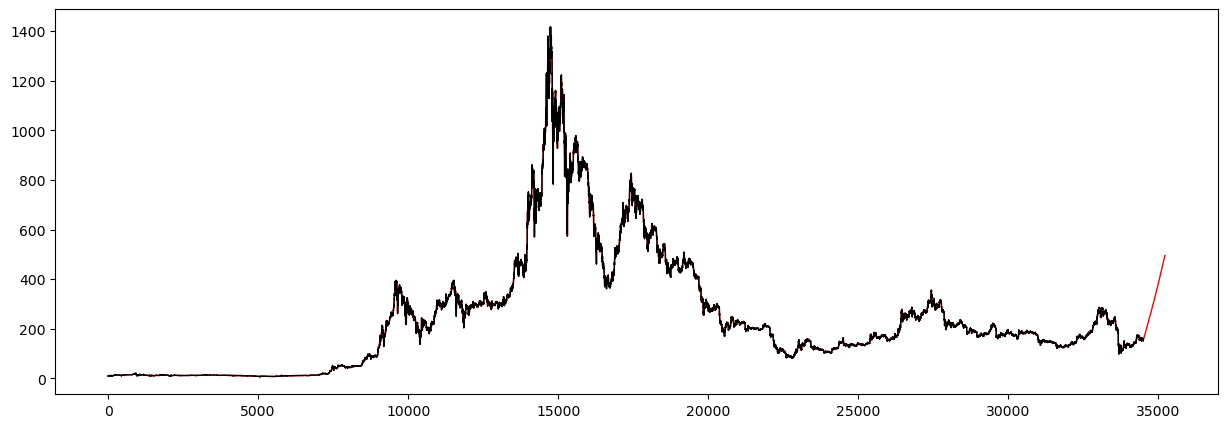

In [43]:
out = []
out = np.append(df.Close.values,new)
plt.figure(figsize=(15,5))
plt.plot(out,linewidth=1,color='red')
plt.plot(df.Close.values,linewidth=1,color='black')
plt.show()

In [44]:
len(out),len(df.Close)

(35217, 34497)